# Input and Output
The purpose of this section of code is to describe the input dataset for this Automated Decision System.  In particular, we wish to explore the input features, their respective distributions and the prevalence of missing values.  Finally, we wish to explore the output of our ADS and its interpretation.

## Import Training Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.ticker as mtick
import seaborn as sns
from pandas_profiling import ProfileReport

aug_train = pd.read_csv('../data/aug_train.csv')
display(aug_train.head())
print(aug_train.shape)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


(19158, 14)


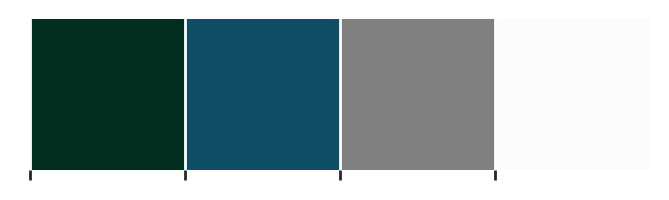

In [2]:
# For Visualizations
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 200
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

In [3]:
ProfileReport(aug_train, minimal=True).to_file(output_file="train_profile_report.html")

## Possible Values and Missing Data

In [4]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
aug_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [6]:
aug_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## Visualization of Categorial Features

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


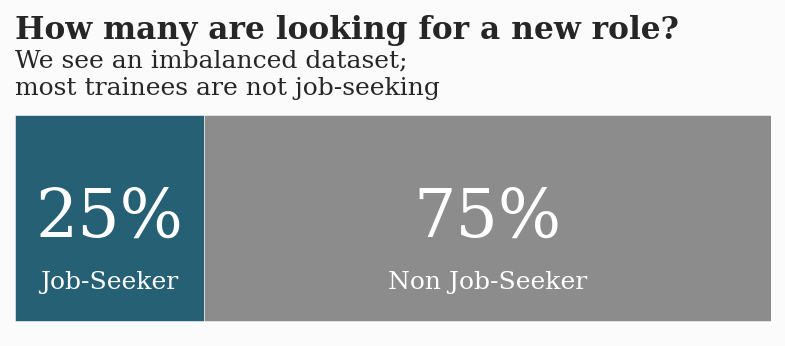

In [7]:
x=aug_train.groupby(['target'])['target'].count()
y=len(aug_train)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif', color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost trainees are not job-seeking',fontfamily='serif',fontsize=12)  

plt.show()

In [8]:
## Convert target to a string feature
aug_train["target"] = aug_train["target"].astype(str)

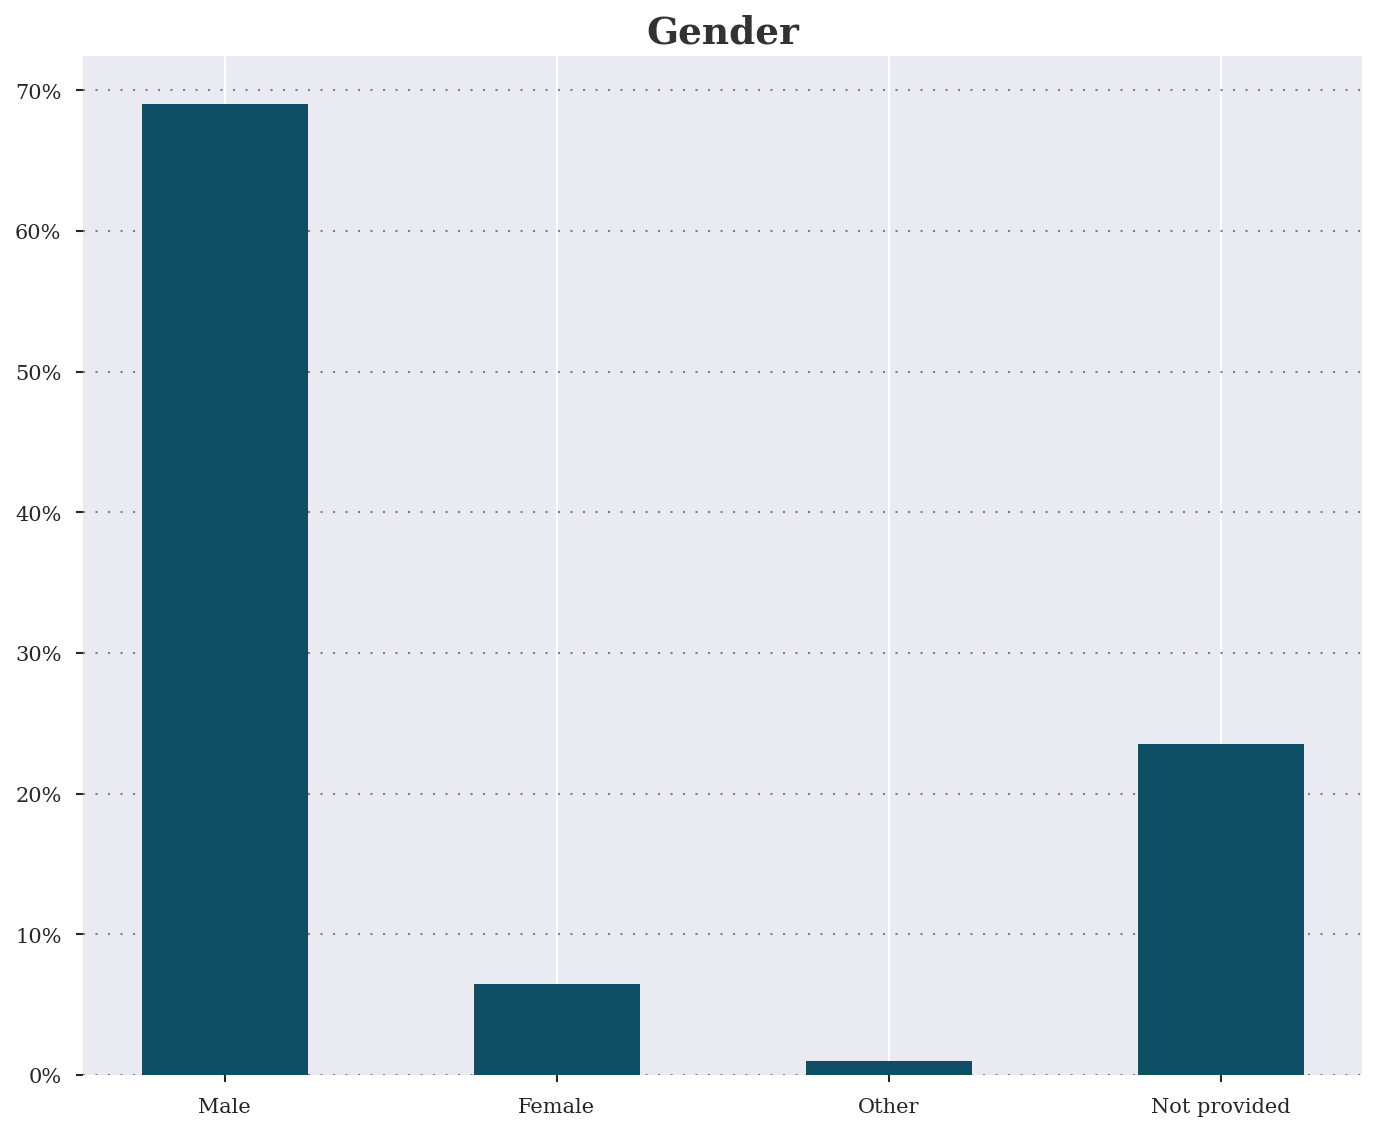

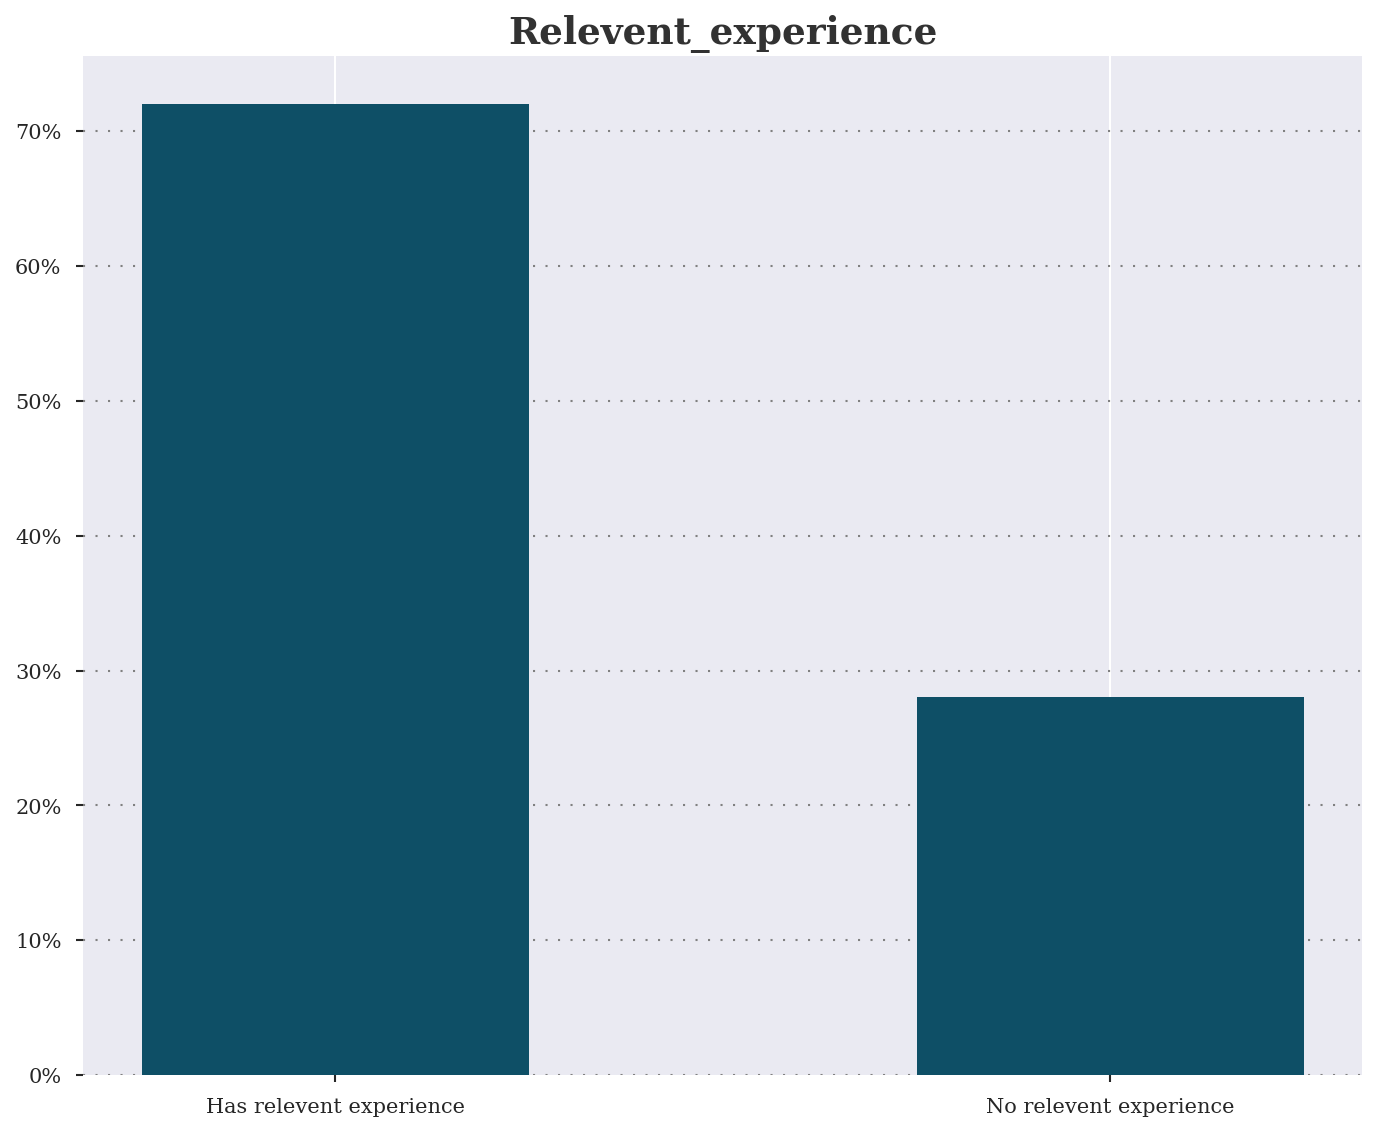

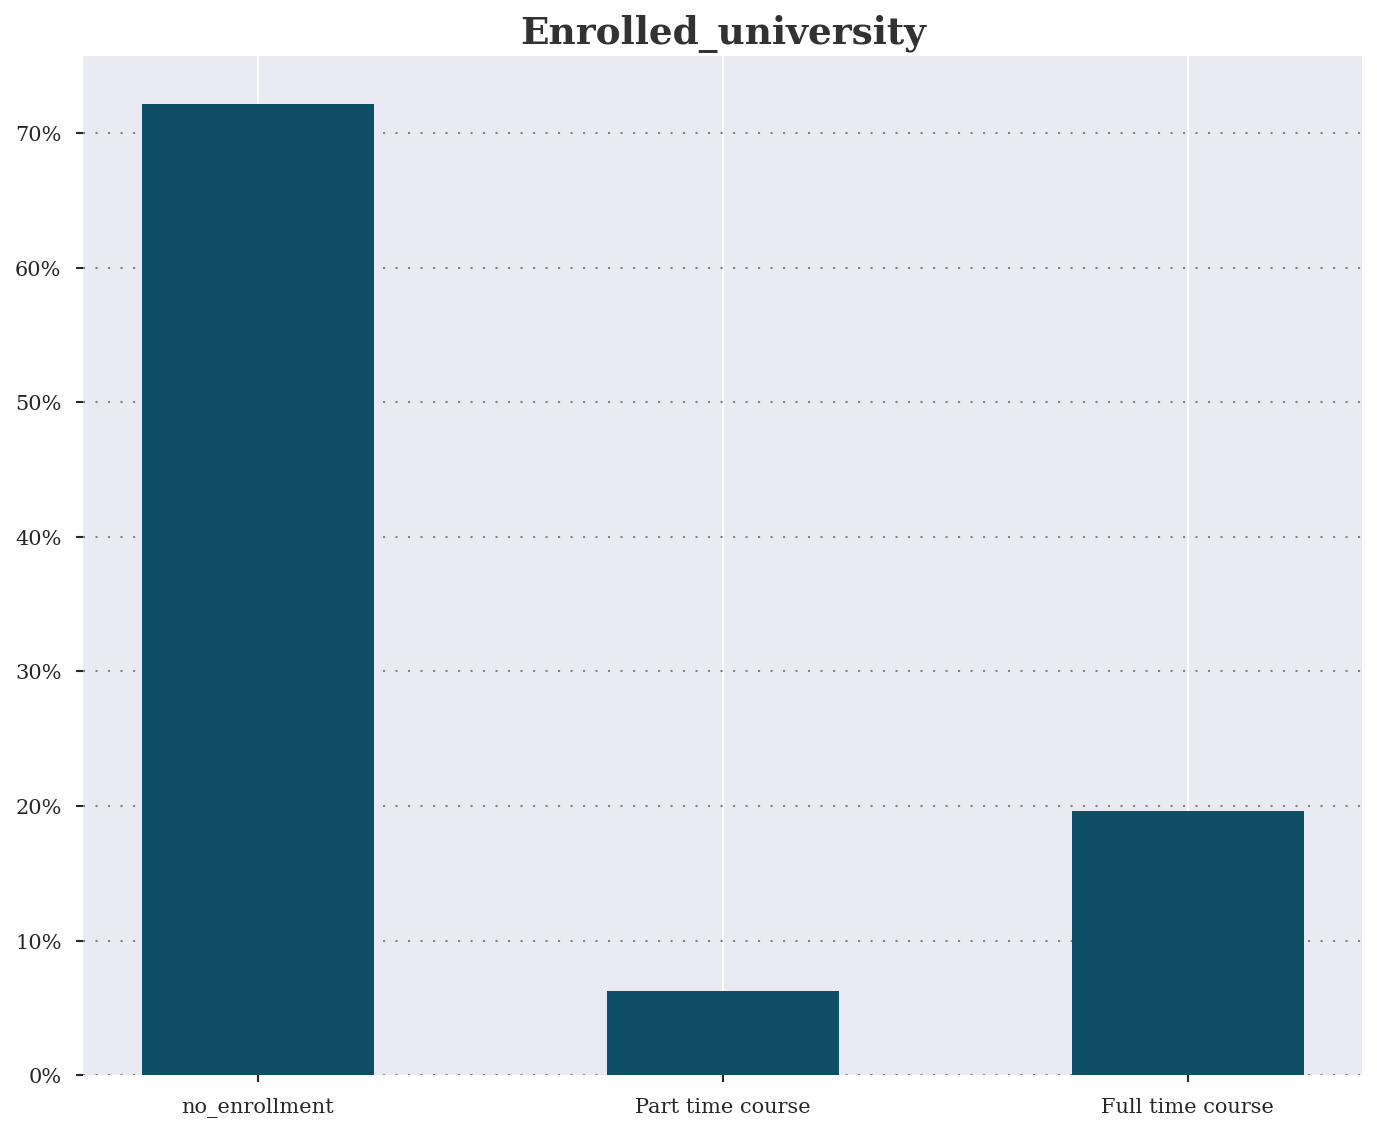

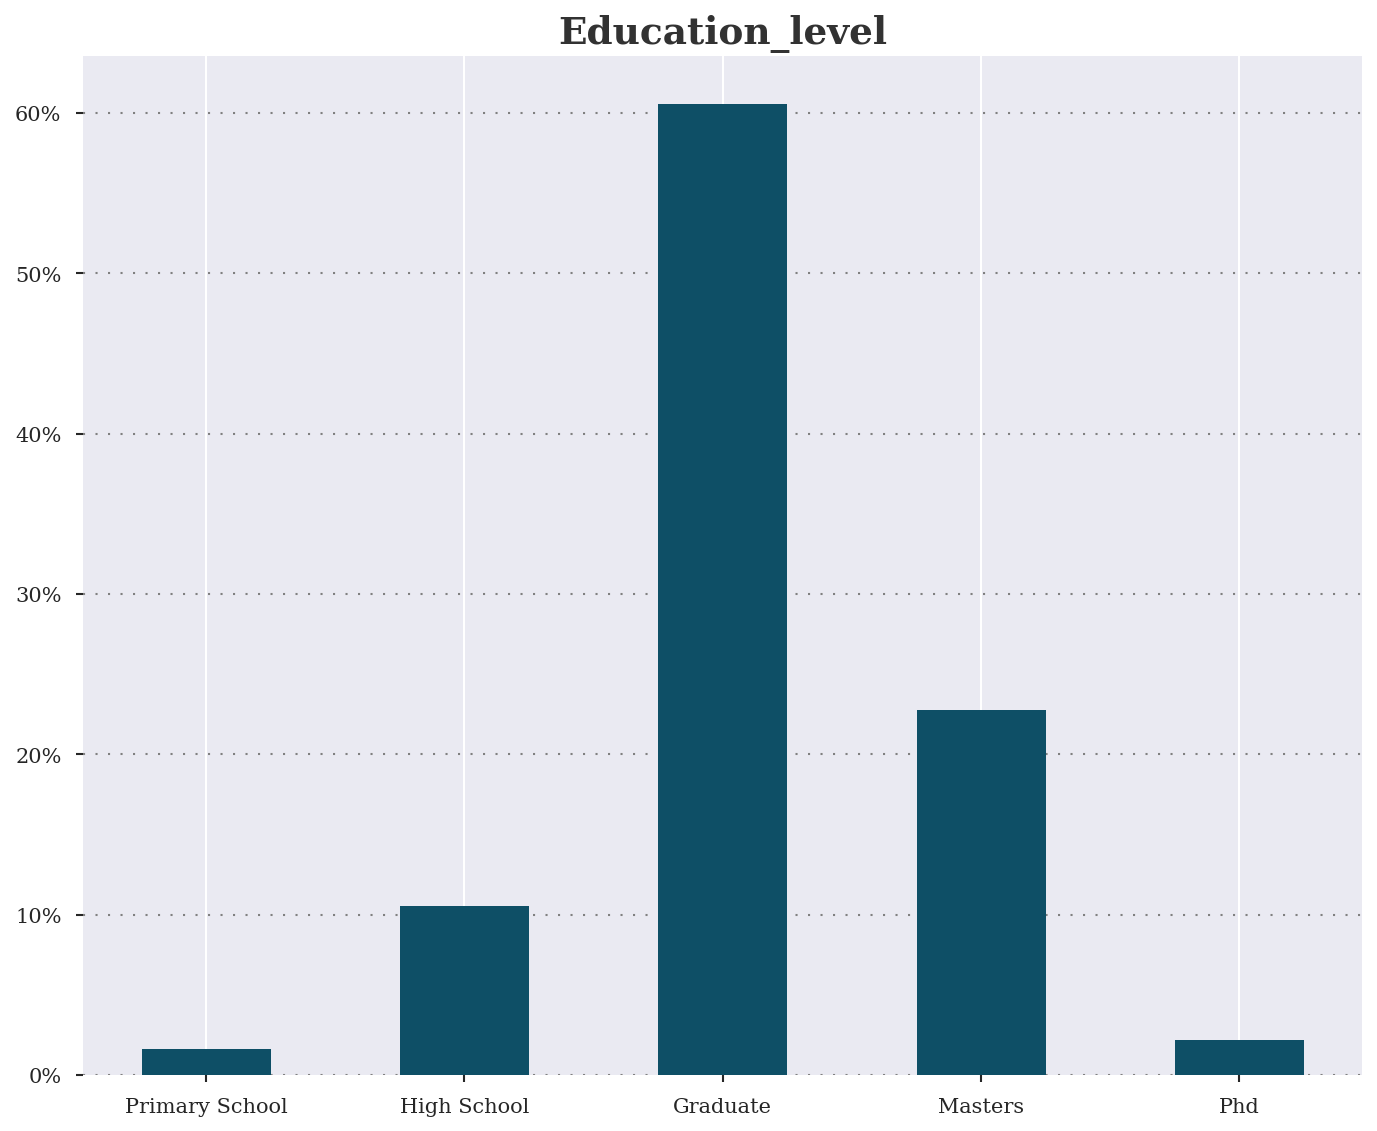

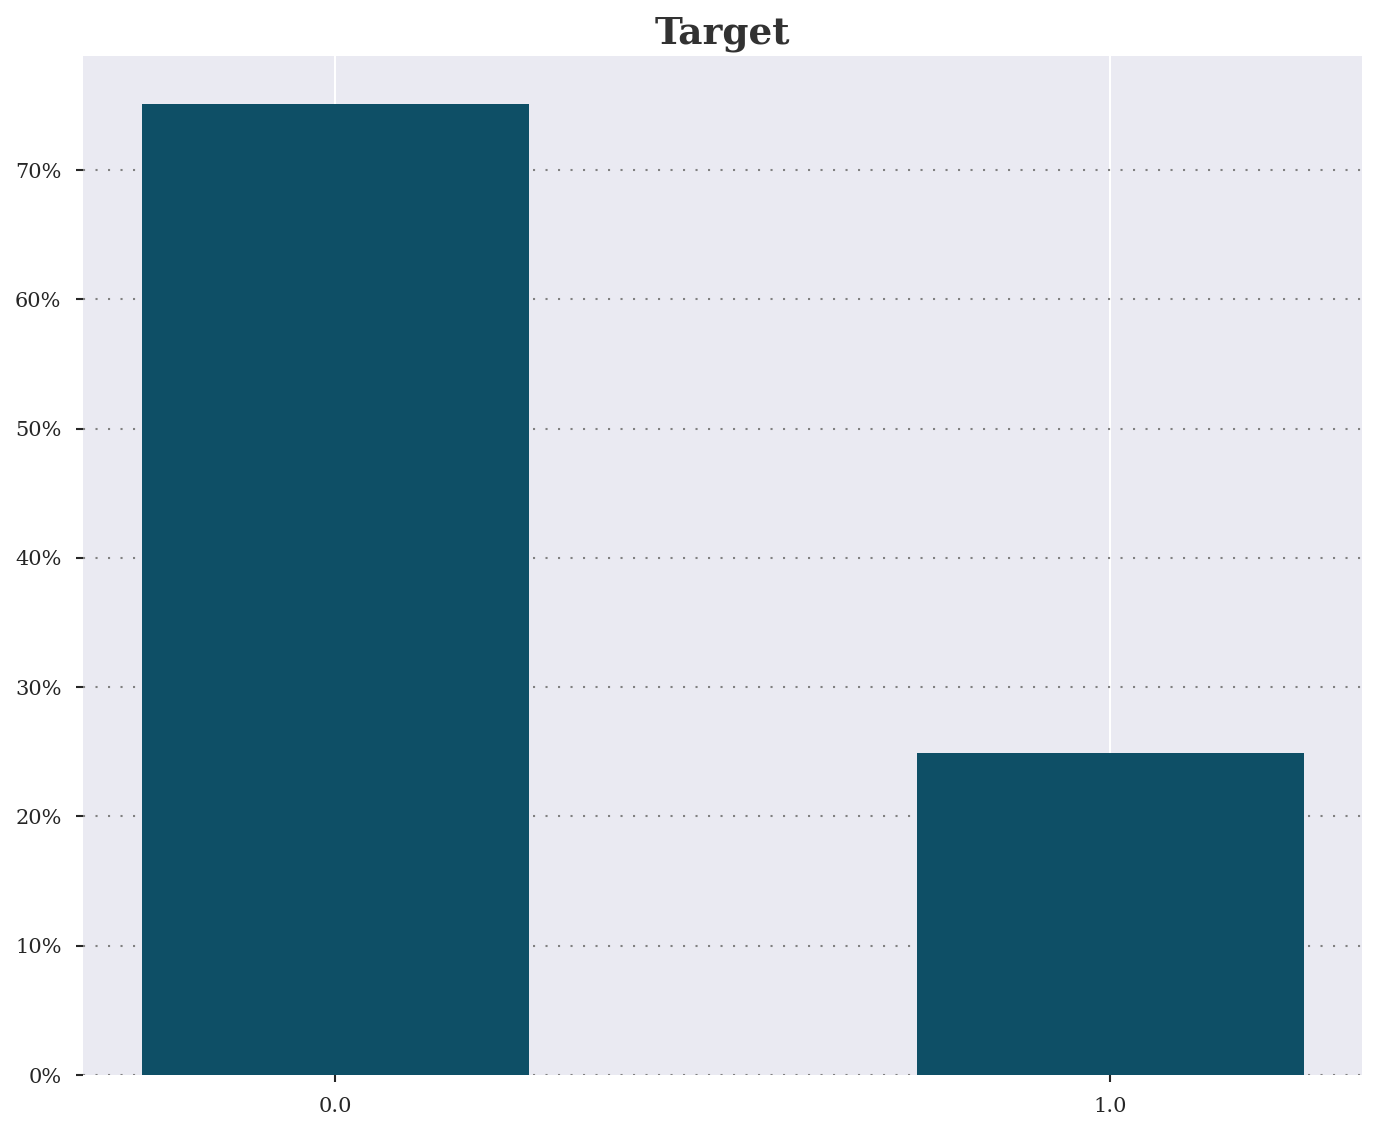

In [9]:
## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()

gender_order = ['Male','Female','Other','Not provided']
relevant_experience_order = ['Has relevent experience','No relevent experience']
enrolled_university_order = ['no_enrollment','Part time course','Full time course']
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
target_order = ['0.0', '1.0']

order_lists = [gender_order, relevant_experience_order, enrolled_university_order,ed_order, target_order]

for col, col_order in zip(low_cardinality_categorical_cols, order_lists):
    
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')
    

    #plt.bar(graph.index, graph[col], zorder=3, color='#0e4f66', width=0.4)
    plt.bar(graph.loc[col_order].index, graph.loc[col_order][col], zorder=3, color='#0e4f66', width=0.5)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

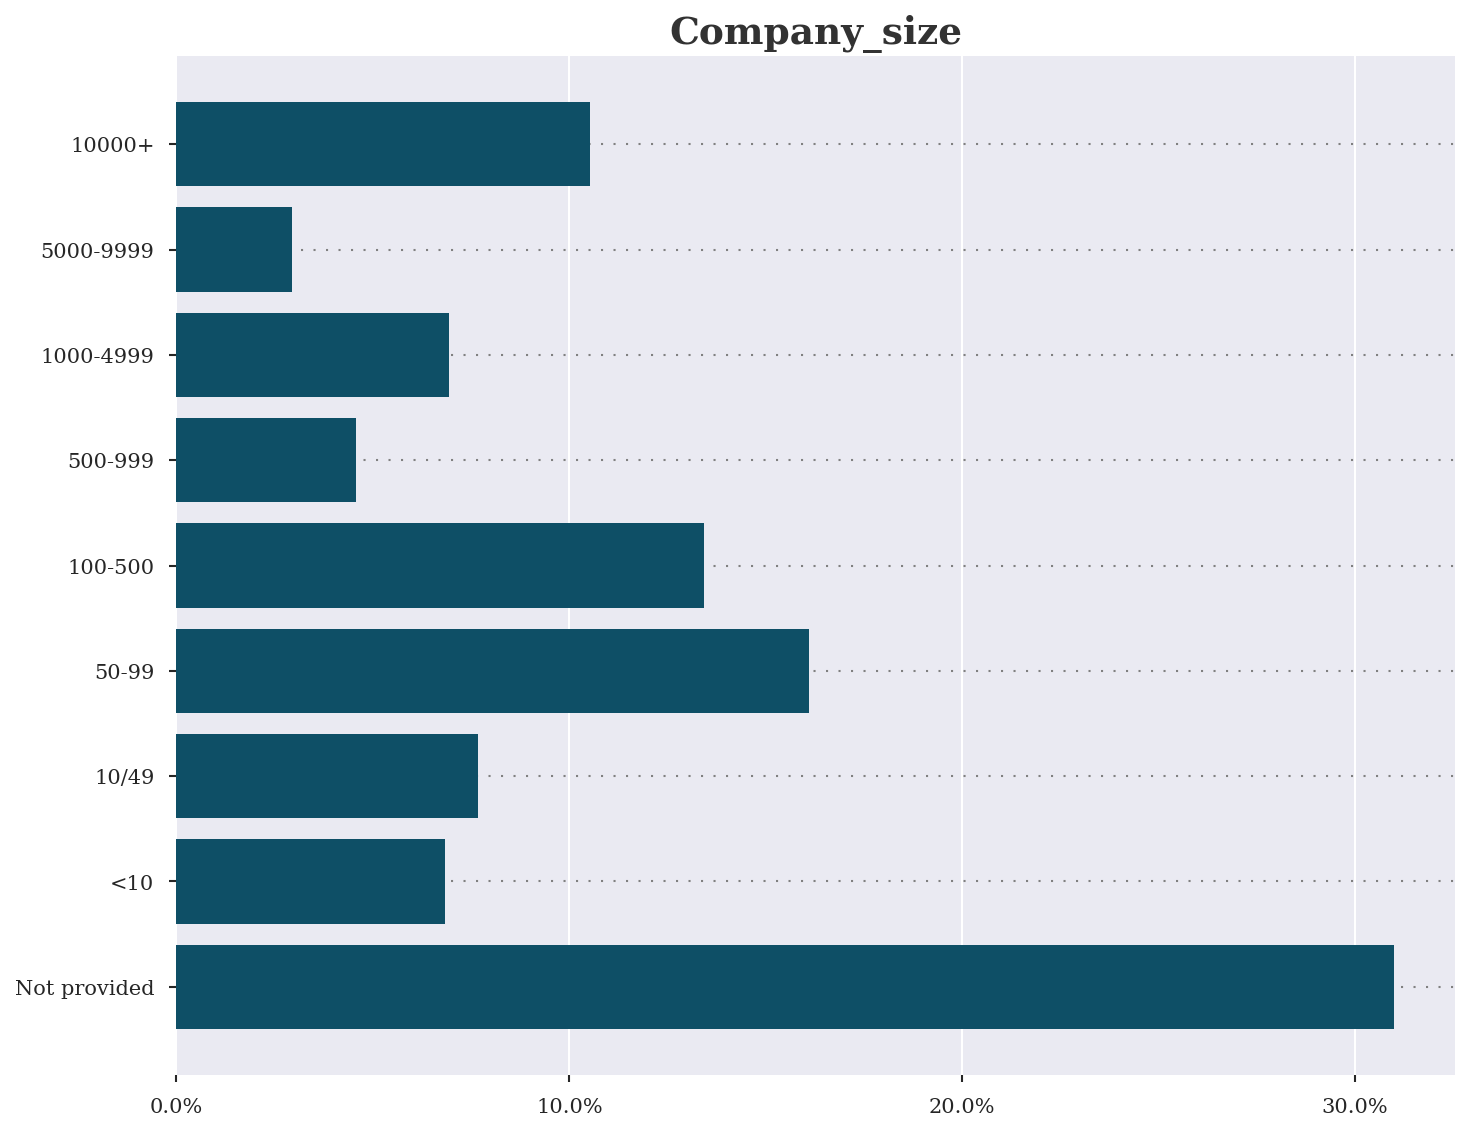

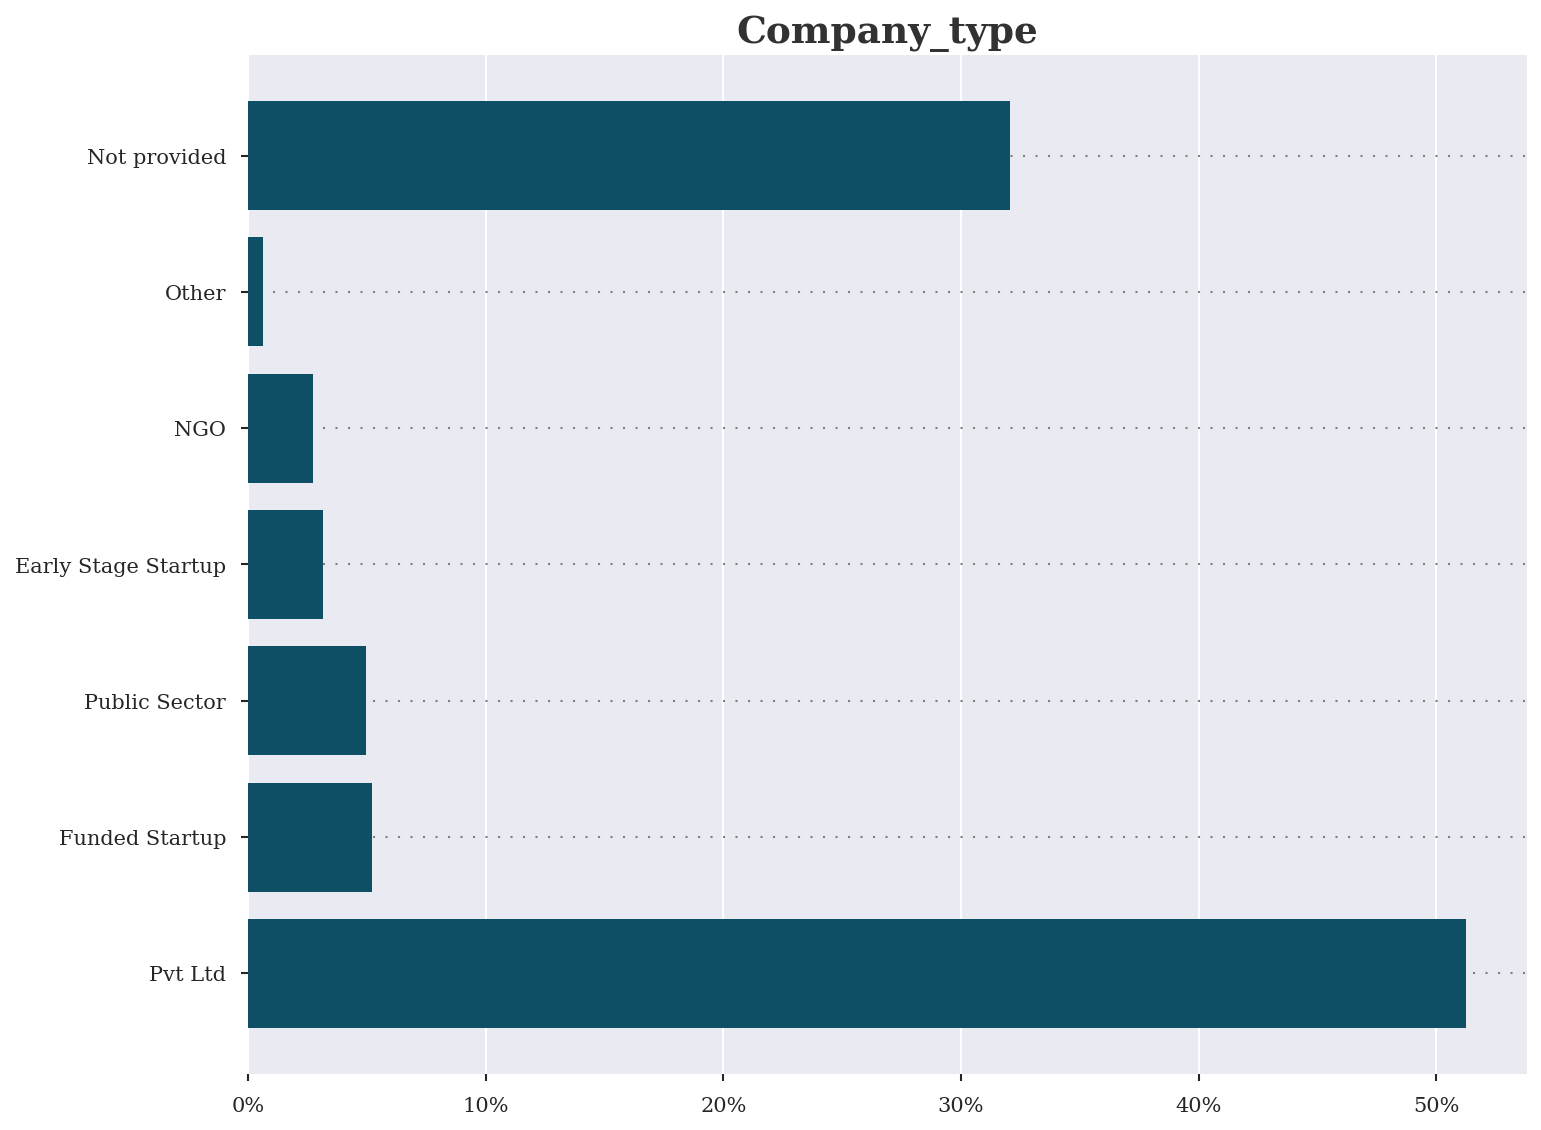

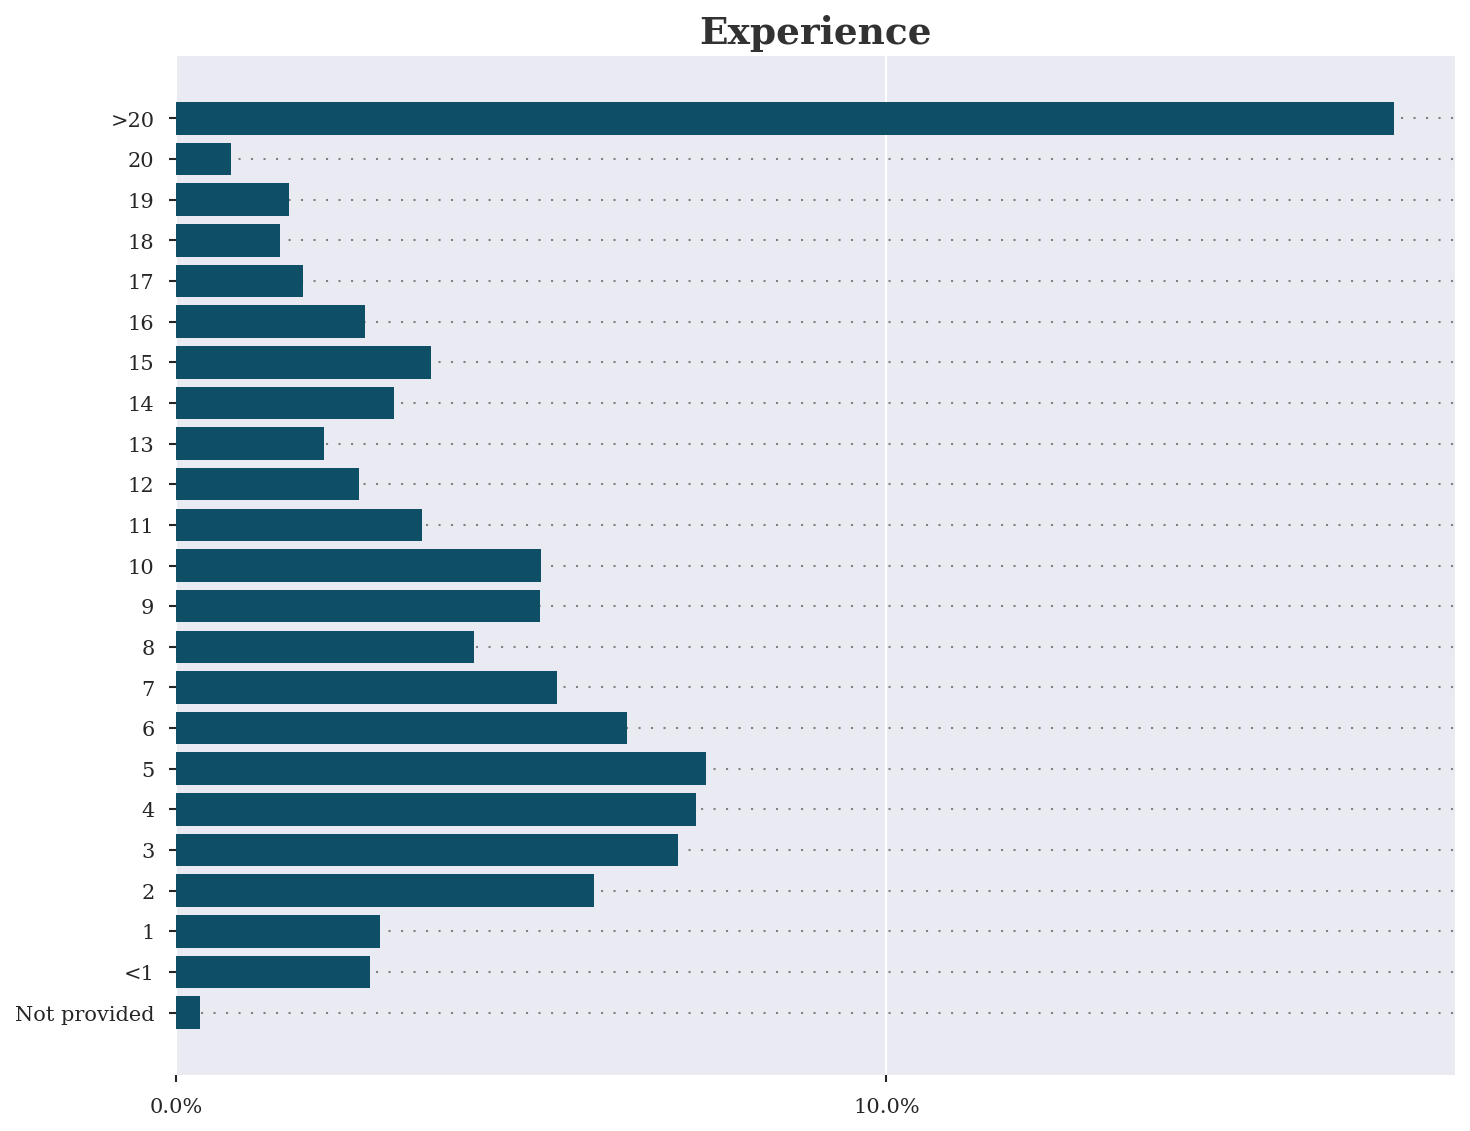

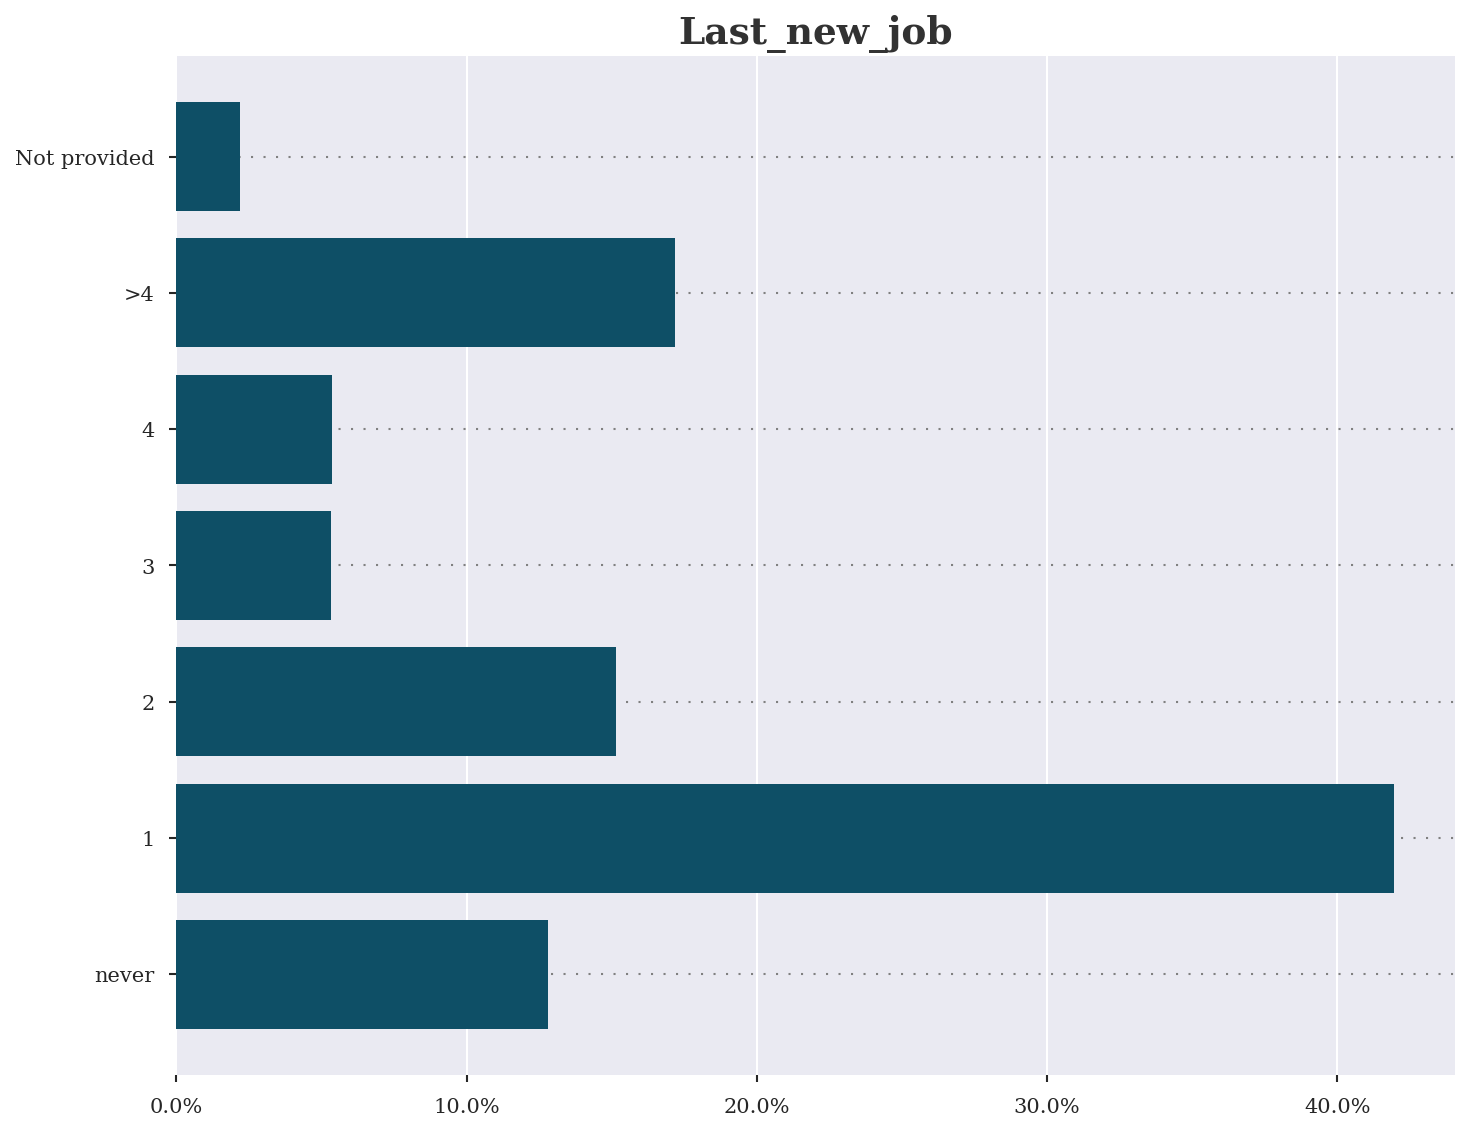

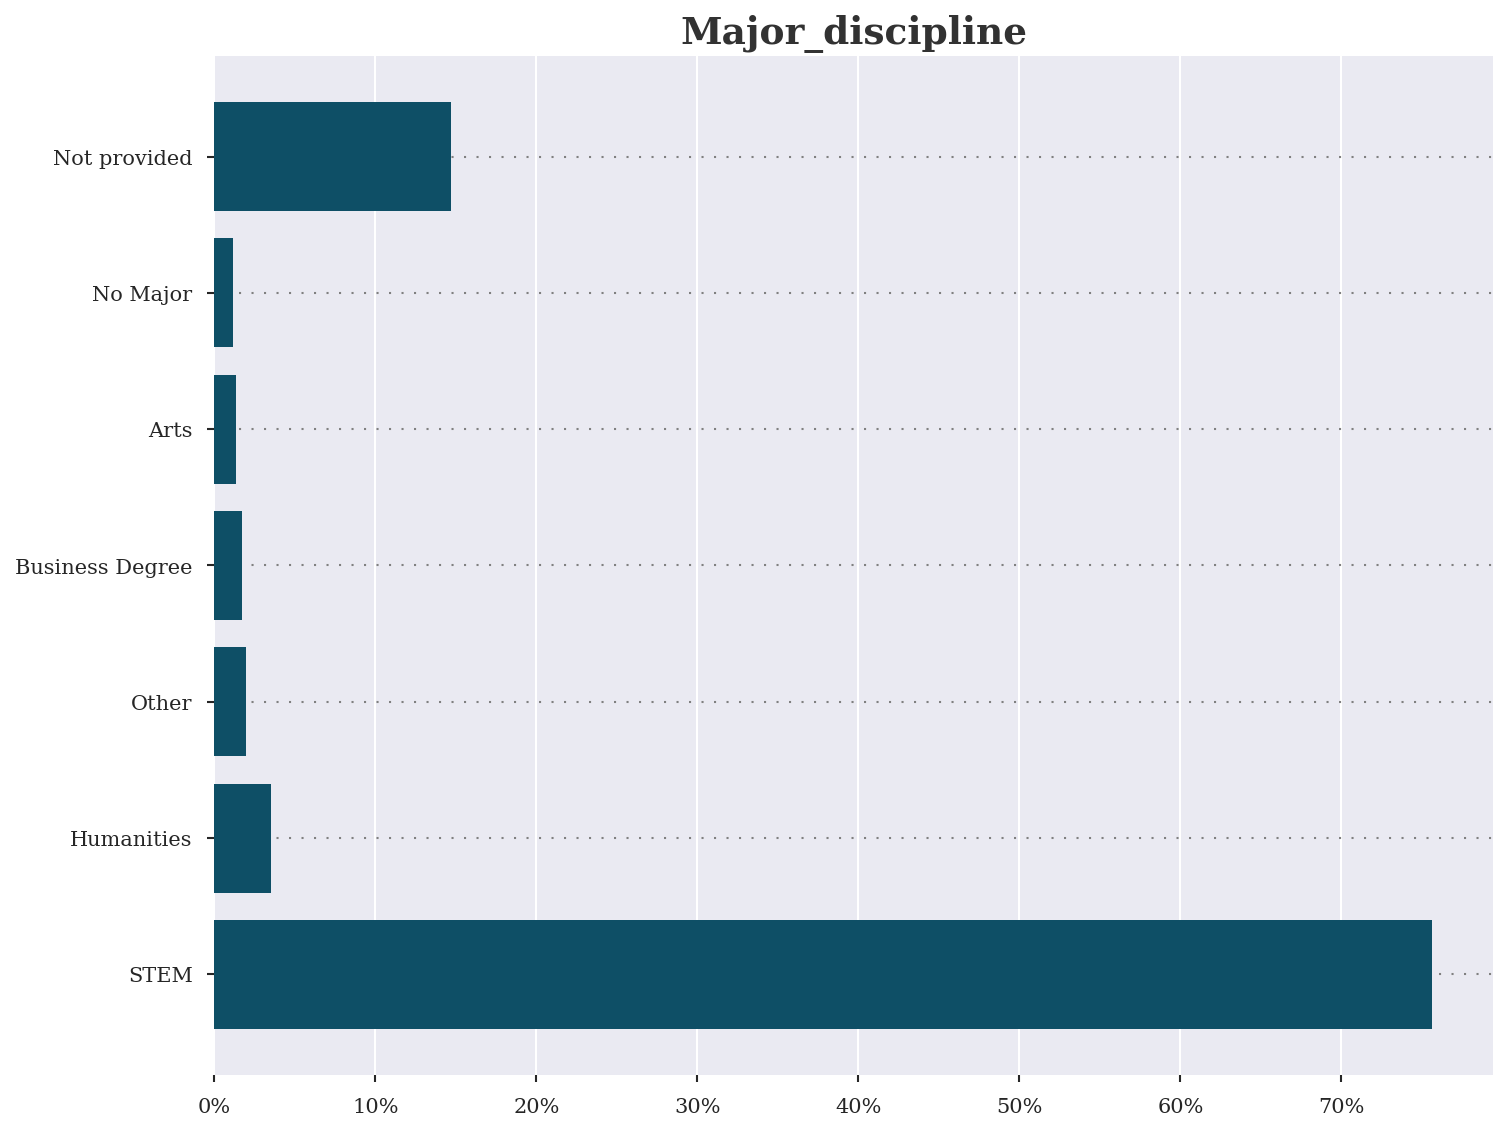

In [10]:
## Cycle through all categorical variables with low cardinality
cat_columns = aug_train.select_dtypes(include=['object']).columns.tolist()
high_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()>5].tolist()

high_cardinality_categorical_cols = list(set(cat_columns) & set(high_cardinality_categorical_cols))
high_cardinality_categorical_cols.remove('city')
high_cardinality_categorical_cols.sort()

disc_order = ['STEM','Humanities','Other','Business Degree','Arts','No Major','Not provided']
exp_yrs_order = ['Not provided','<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
size_order = ['Not provided','<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['never', '1', '2', '3', '4', '>4', 'Not provided']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other','Not provided']

col_orders = [size_order, company_order,  exp_yrs_order, job_order, disc_order]

for col, col_order in zip(high_cardinality_categorical_cols, col_orders):
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.barh(graph.loc[col_order].index, graph.loc[col_order][col], zorder=3, color='#0e4f66')

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

<AxesSubplot:title={'center':'City Development Index'}, xlabel='city_development_index', ylabel='Density'>

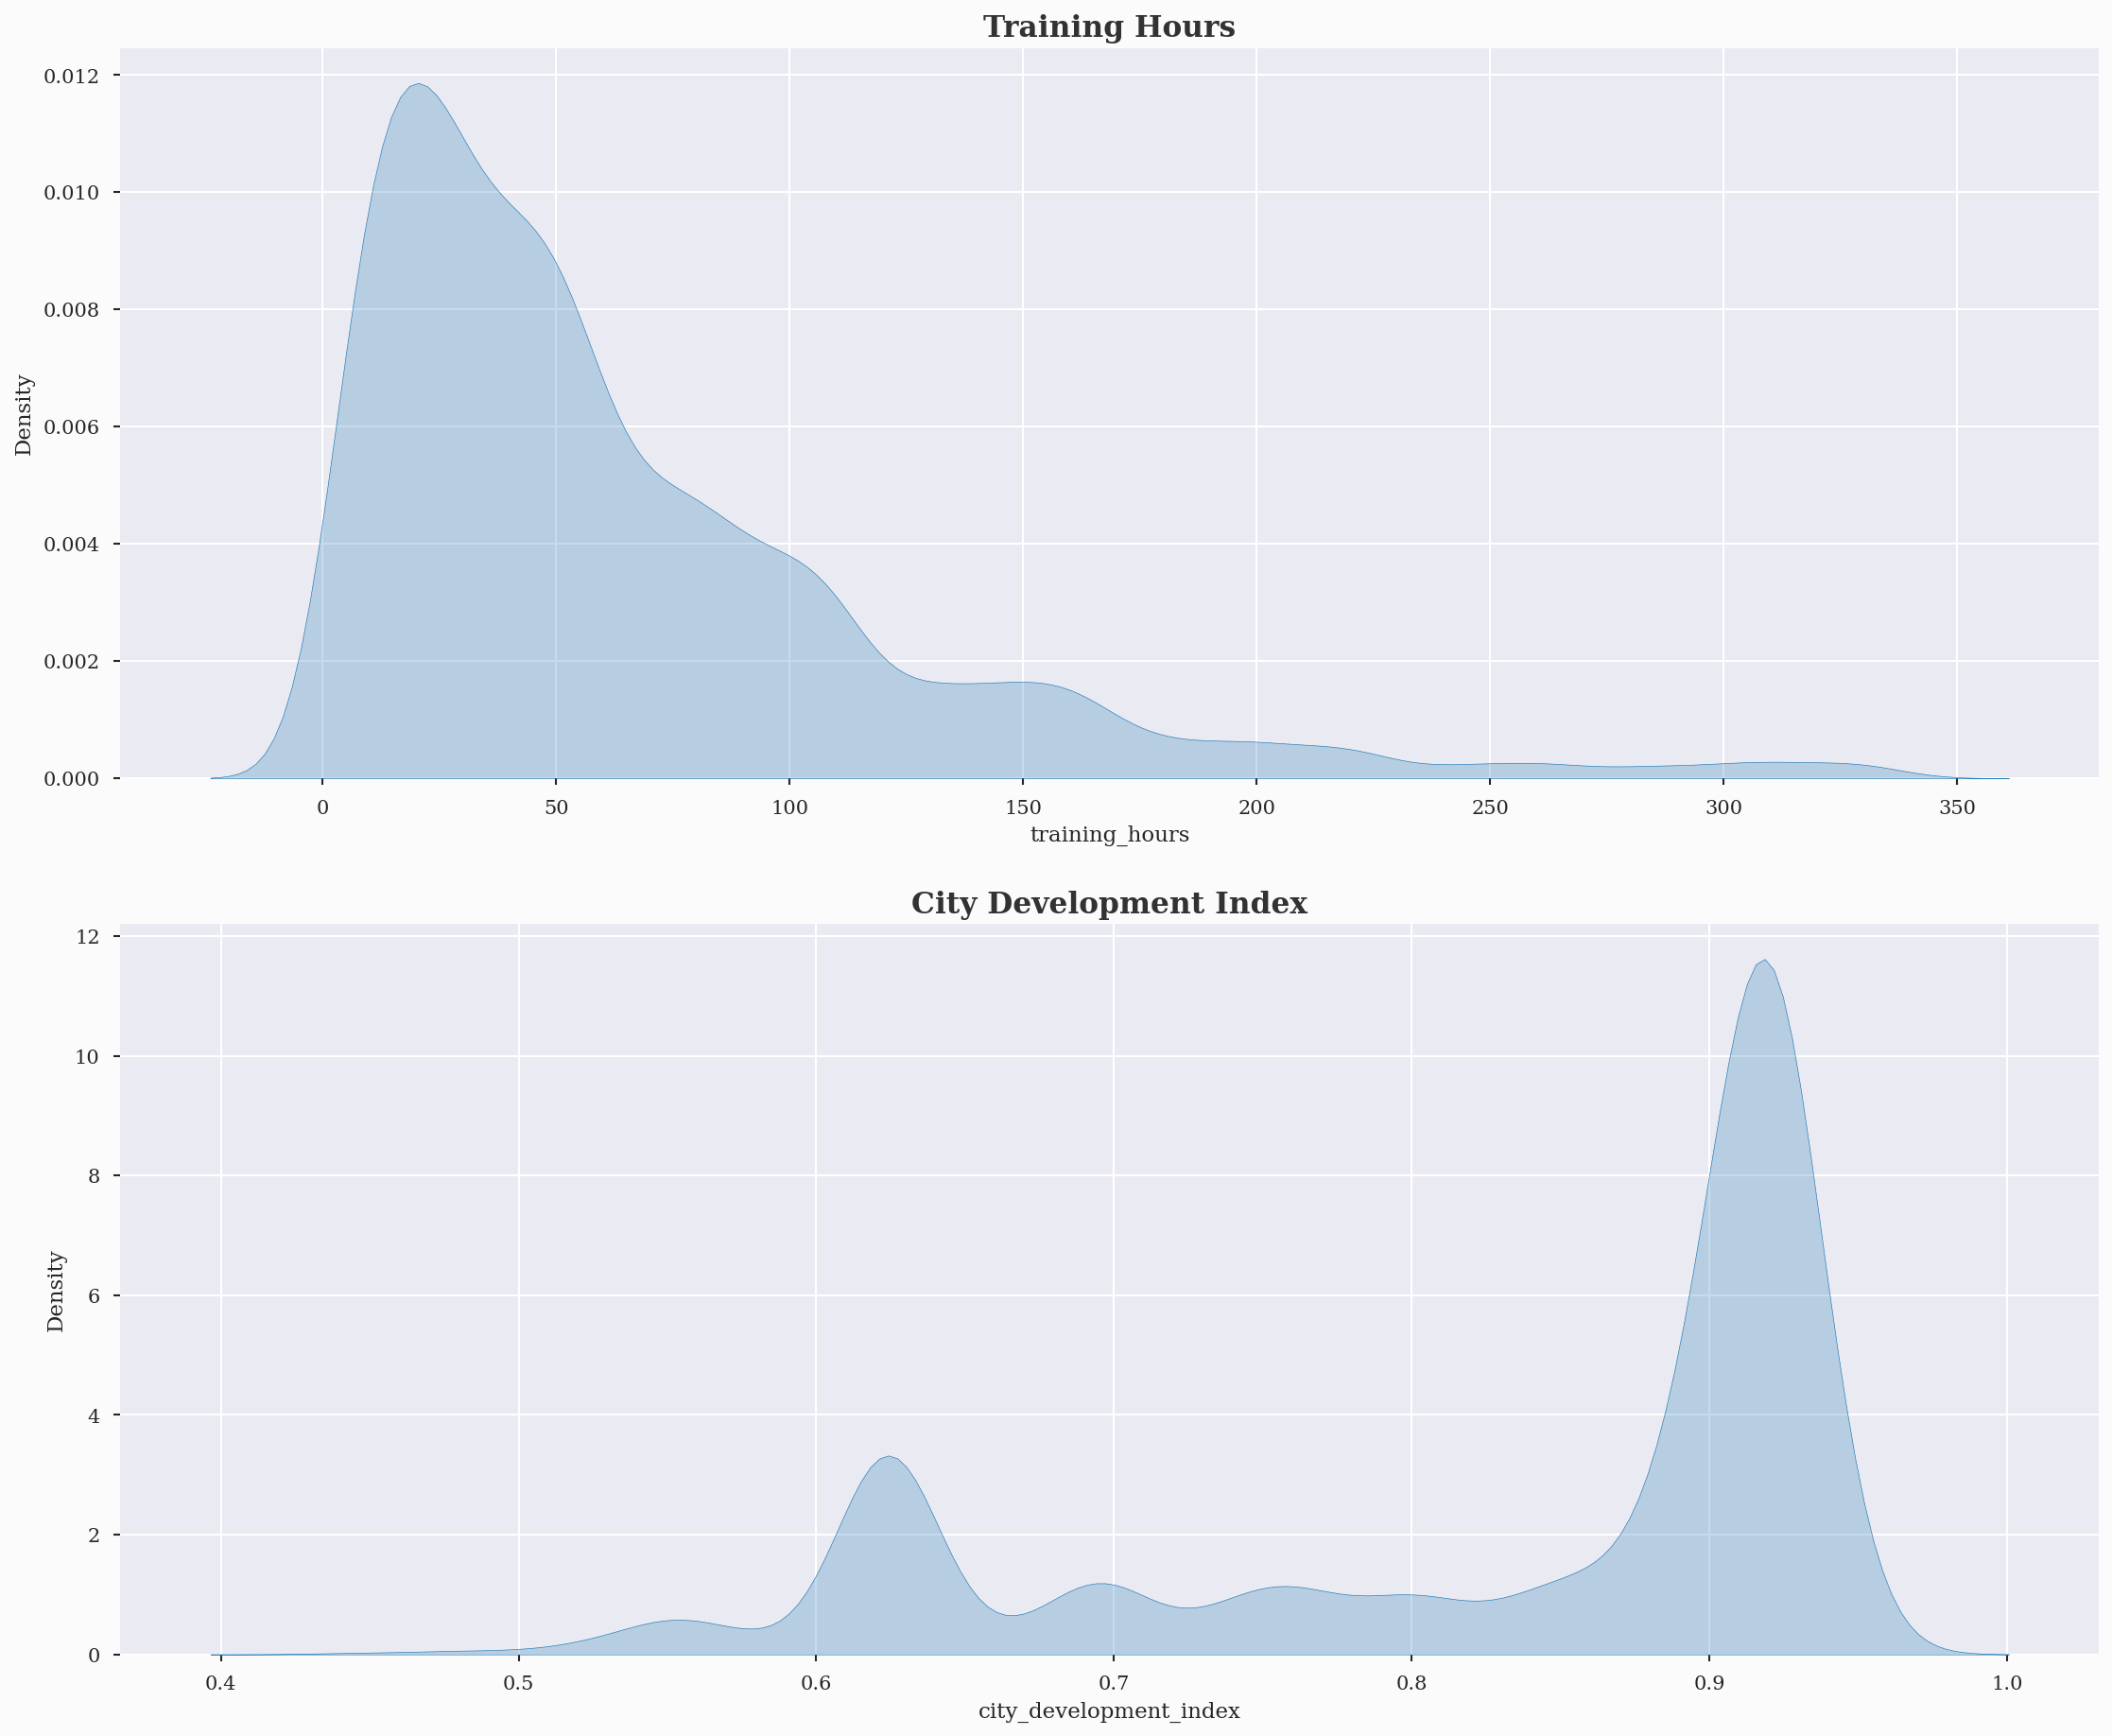

In [11]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["training_hours"], shade=True, ax = ax0, zorder = 3)

ax1.set_title('City Development Index', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["city_development_index"], shade=True, ax = ax1, zorder = 3)

## Work on the Difference in Distribution on protected attributes

In this dataset, we consider ['gender', 'city_development_index', 'experience', 'target'] to all be protected attributes

<AxesSubplot:title={'center':'City Development Index By Target'}, xlabel='city_development_index', ylabel='Density'>

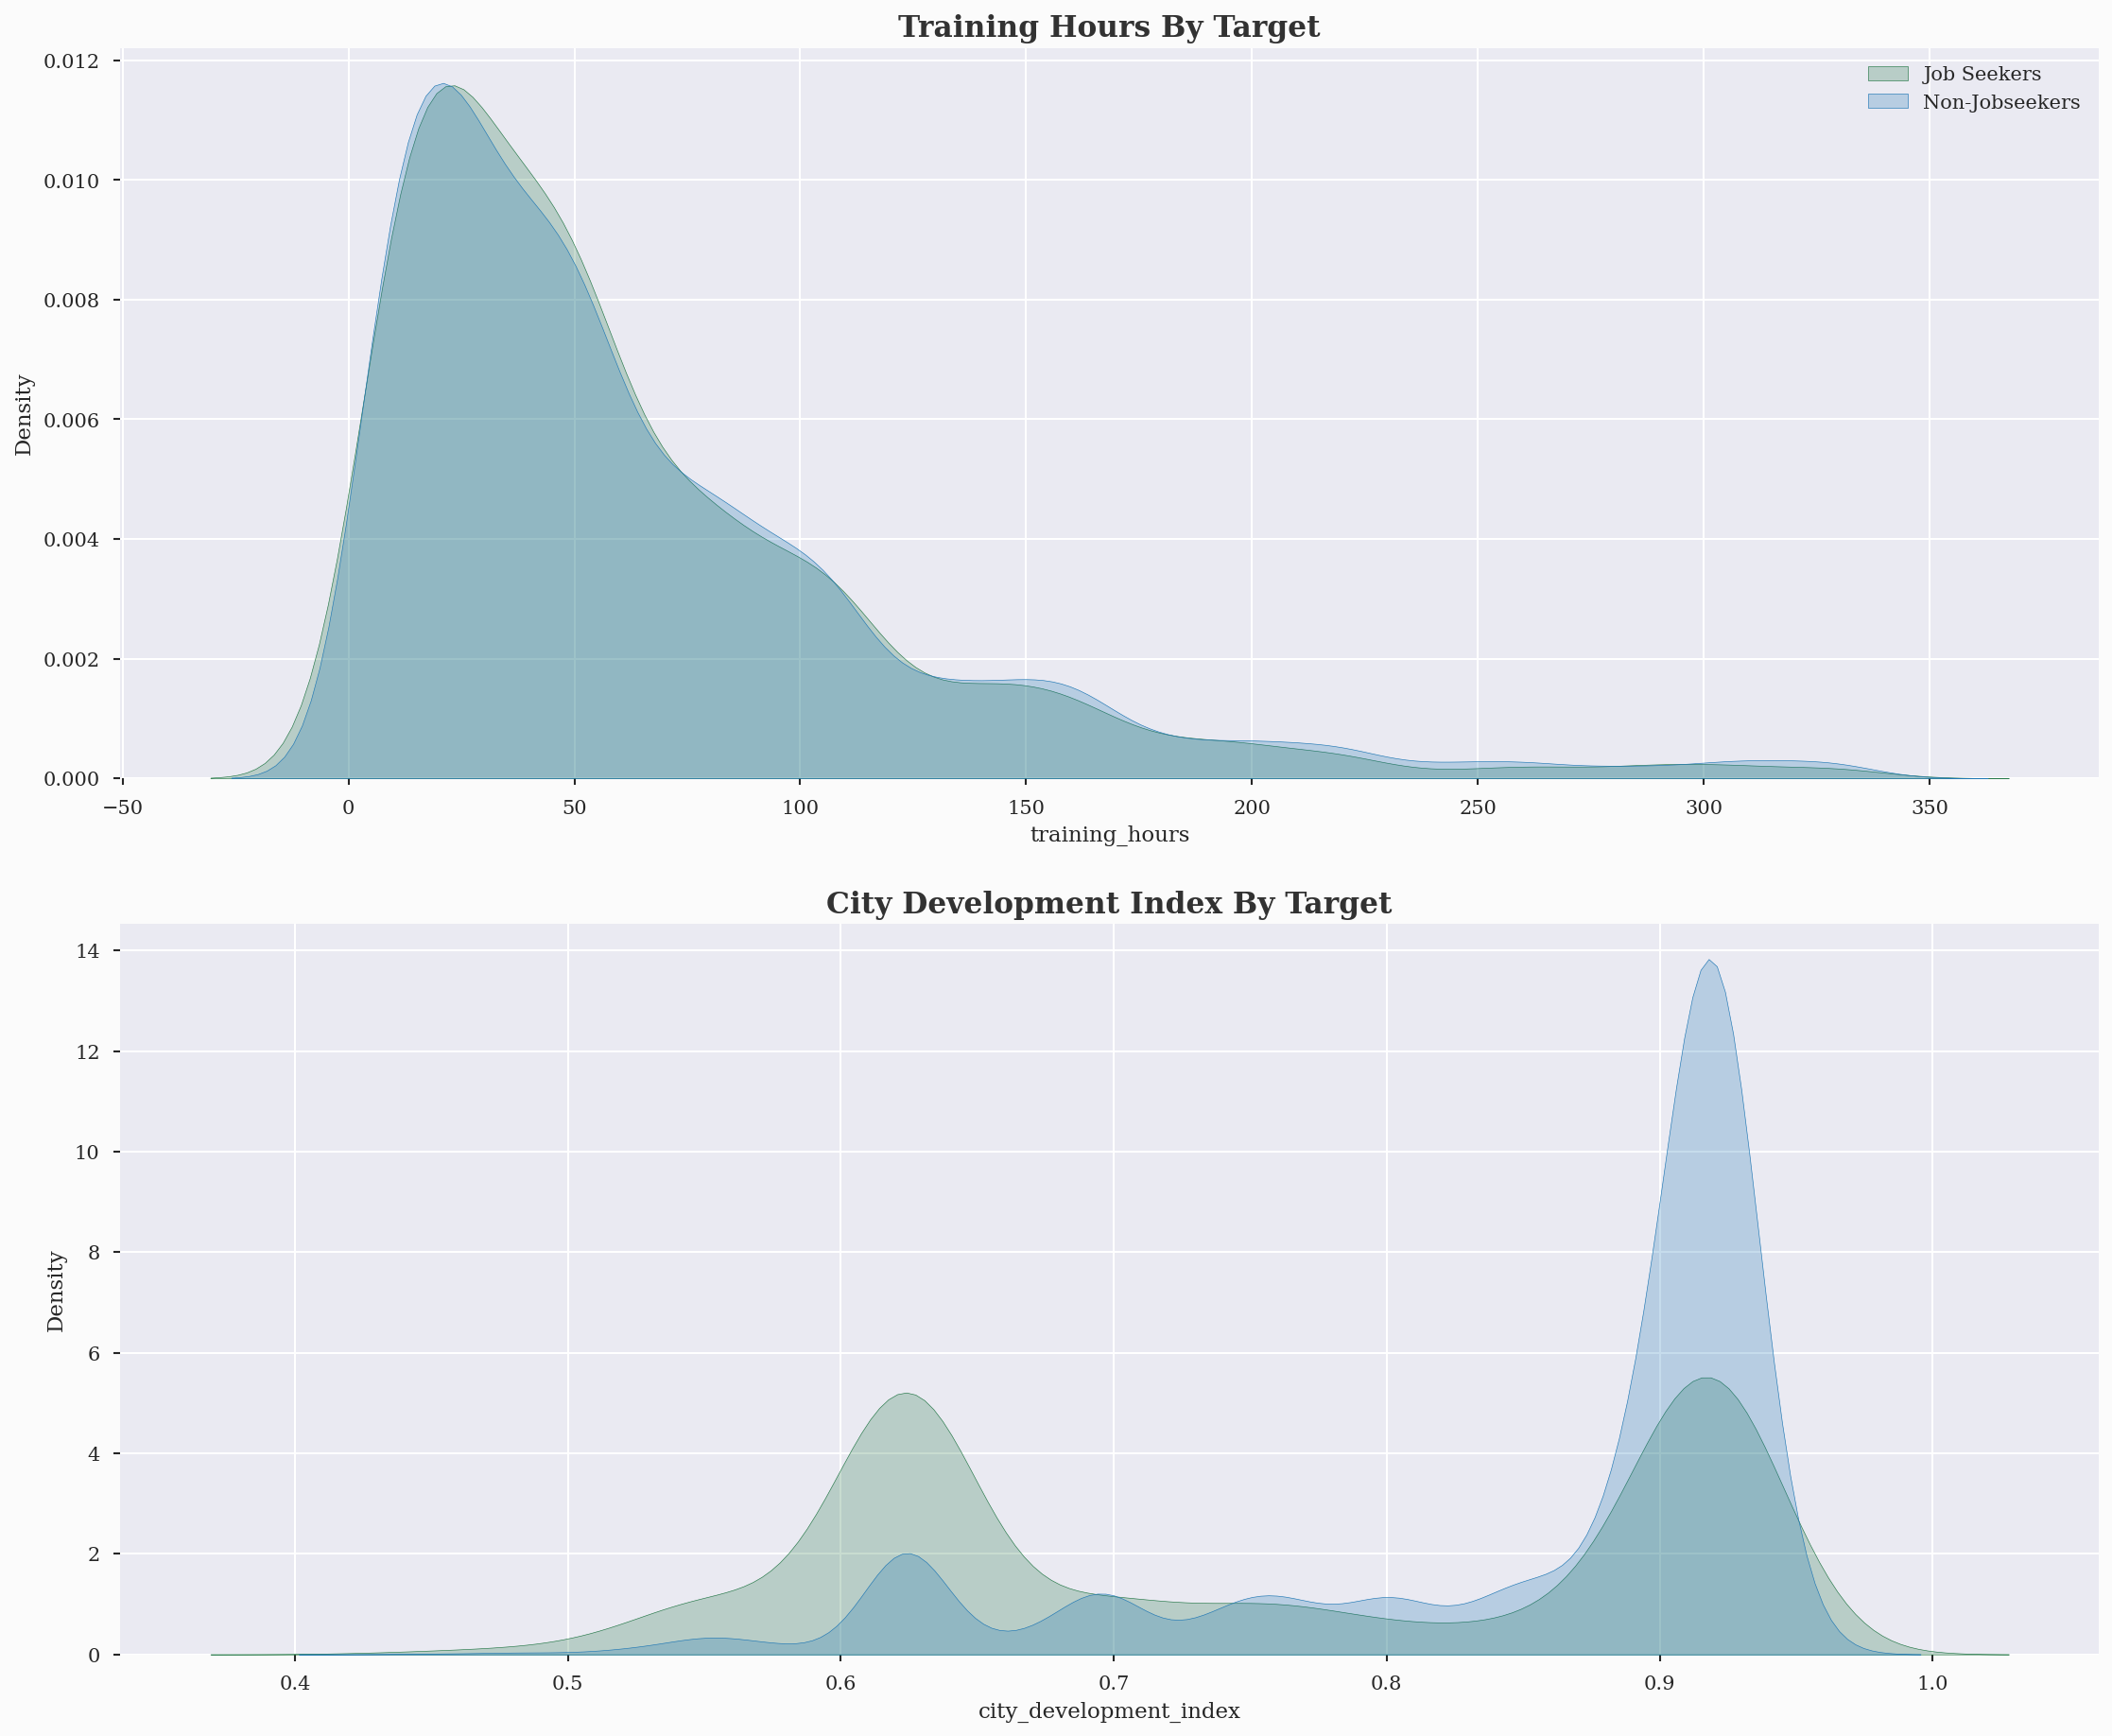

In [12]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

jobseekers = aug_train[aug_train.target=='1.0']
nonjobseekers = aug_train[aug_train.target=='0.0']

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours By Target', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(jobseekers["training_hours"], color="#247747", shade=True, ax = ax0, zorder = 3, label='Job Seekers')
sns.kdeplot(nonjobseekers["training_hours"], shade=True, ax = ax0, zorder = 3, label='Non-Jobseekers')
ax0.legend()

ax1.set_title('City Development Index By Target', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(jobseekers["city_development_index"], color="#247747", shade=True, ax = ax1, zorder = 3)
sns.kdeplot(nonjobseekers["city_development_index"], shade=True, ax = ax1, zorder = 3)

<AxesSubplot:title={'center':'City Development Index By Gender'}, xlabel='city_development_index', ylabel='Density'>

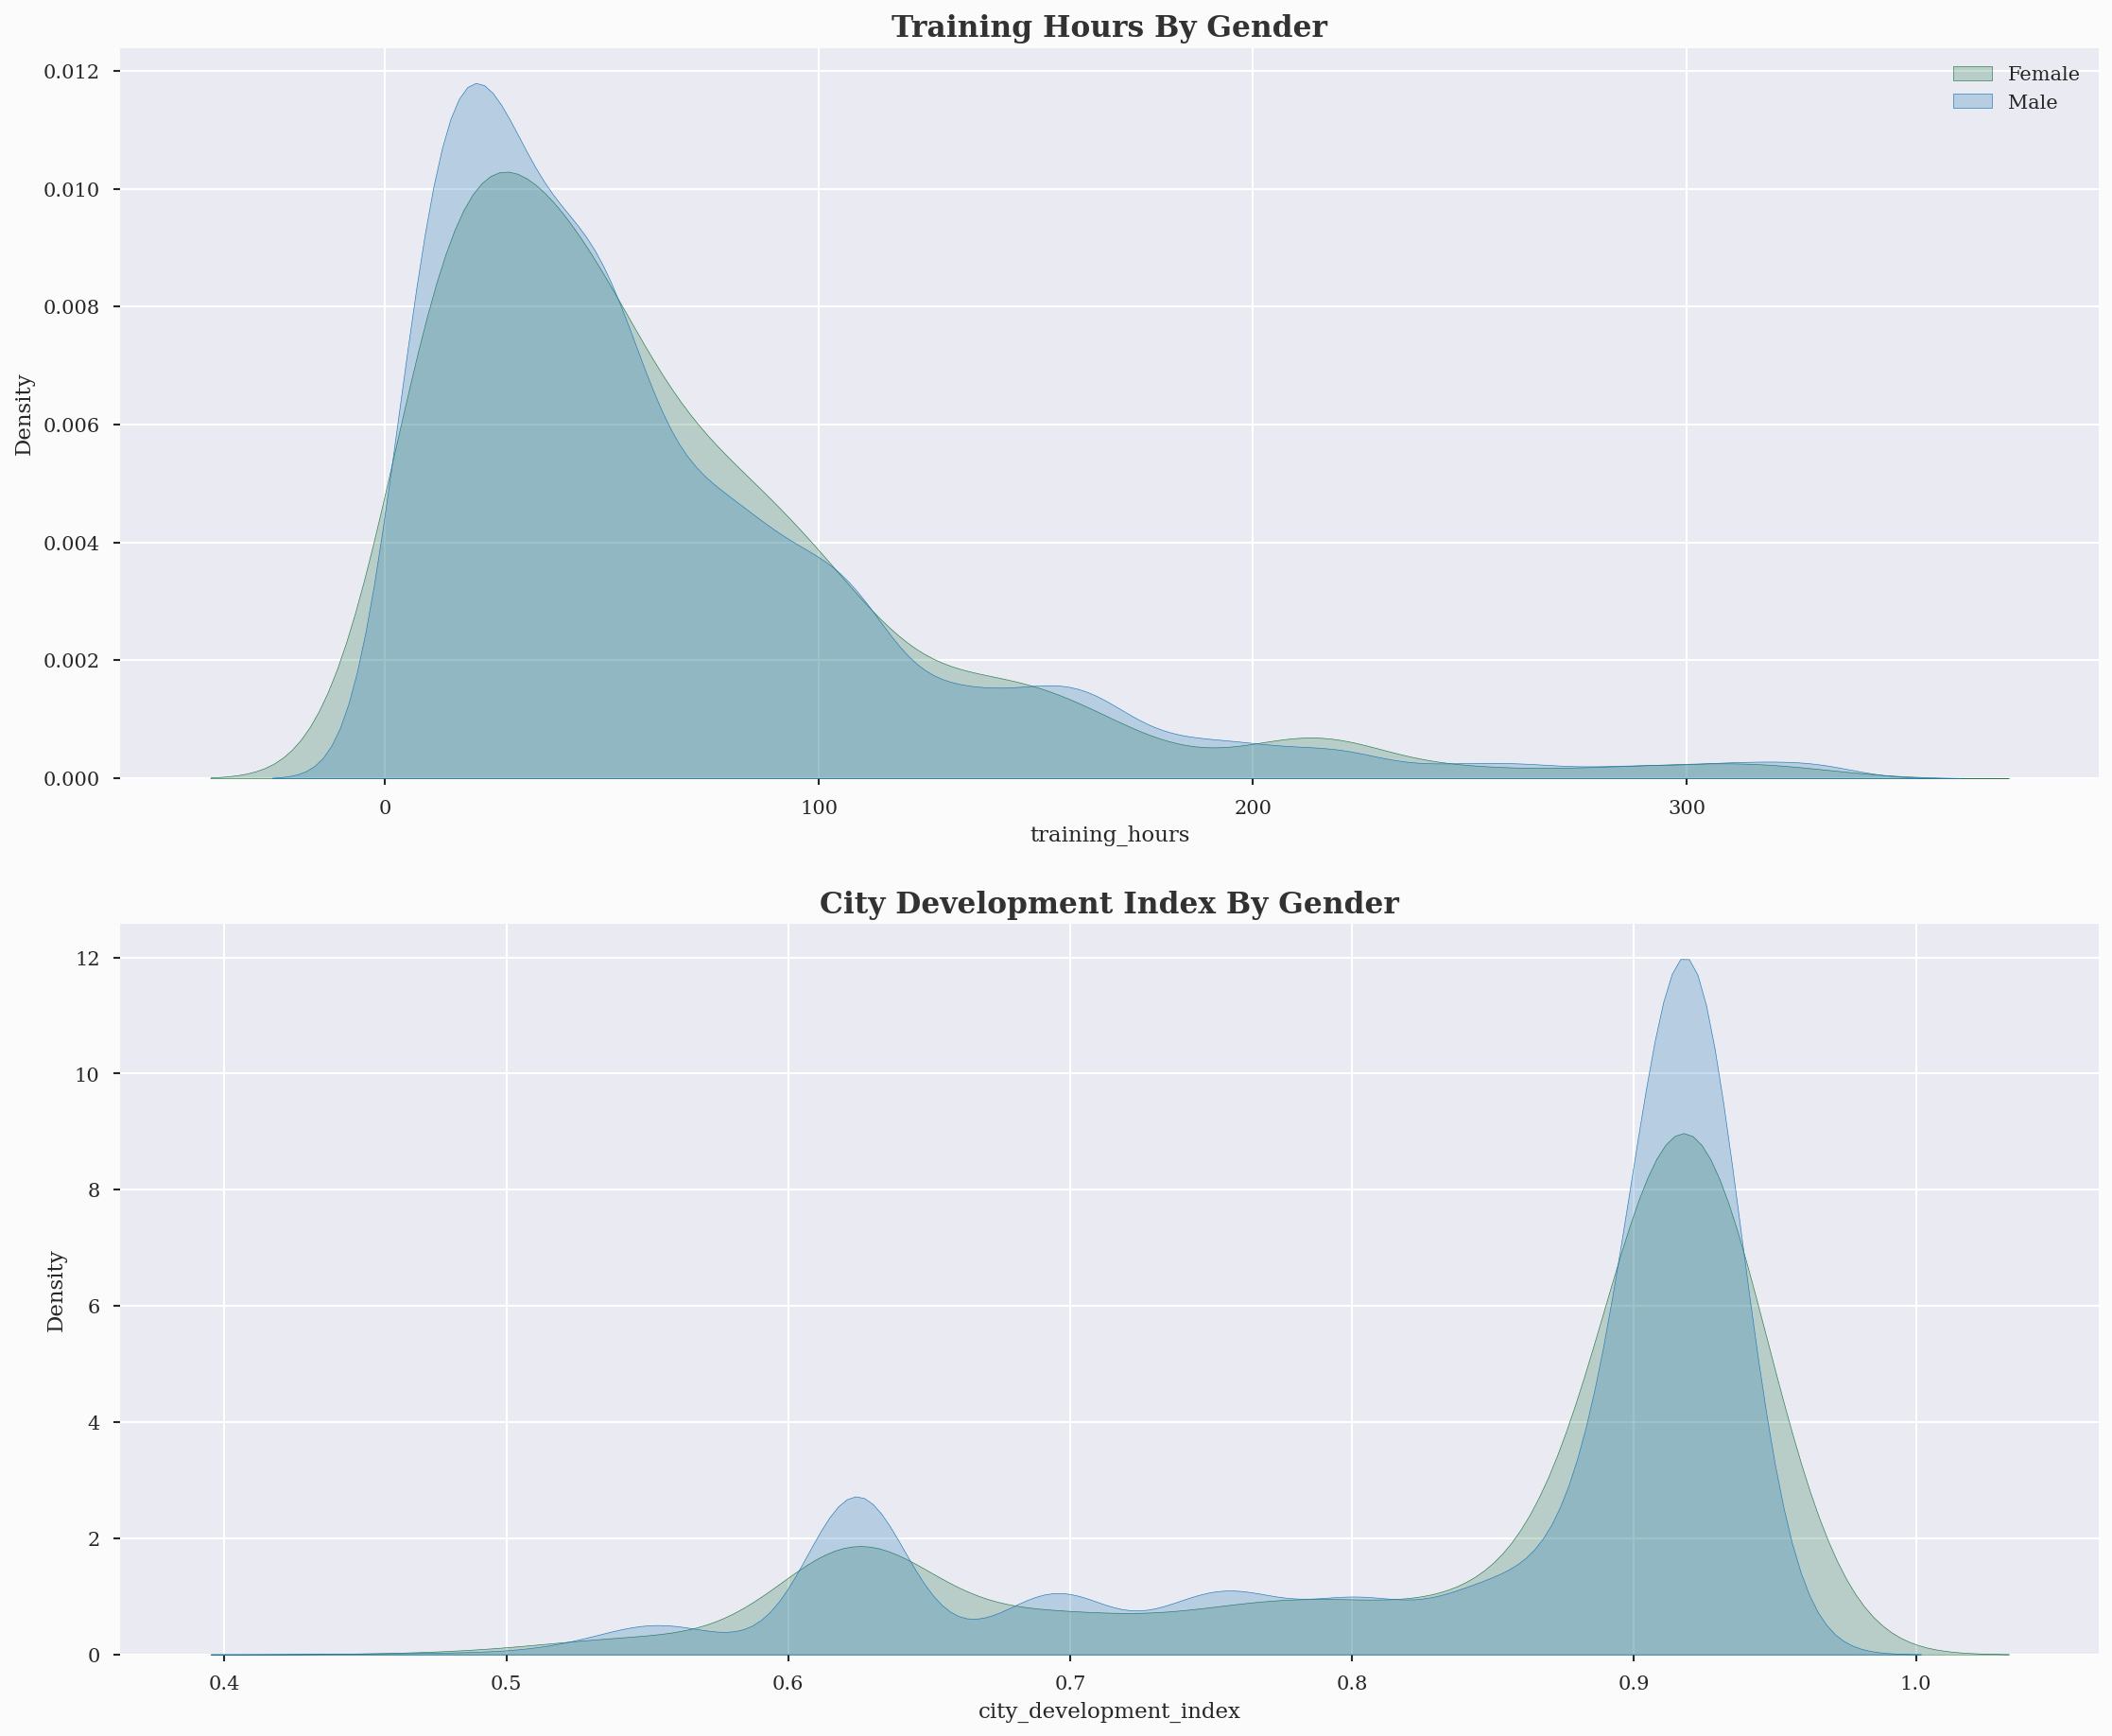

In [13]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

female = aug_train[aug_train.gender=='Female']
male = aug_train[aug_train.gender=='Male']

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours By Gender', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(female["training_hours"], color="#247747", shade=True, ax = ax0, zorder = 3, label='Female')
sns.kdeplot(male["training_hours"], shade=True, ax = ax0, zorder = 3, label='Male')
ax0.legend()

ax1.set_title('City Development Index By Gender', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(female["city_development_index"], color="#247747", shade=True, ax = ax1, zorder = 3)
sns.kdeplot(male["city_development_index"], shade=True, ax = ax1, zorder = 3)

<AxesSubplot:title={'center':'City Development Index By Relevant Experience'}, xlabel='city_development_index', ylabel='Density'>

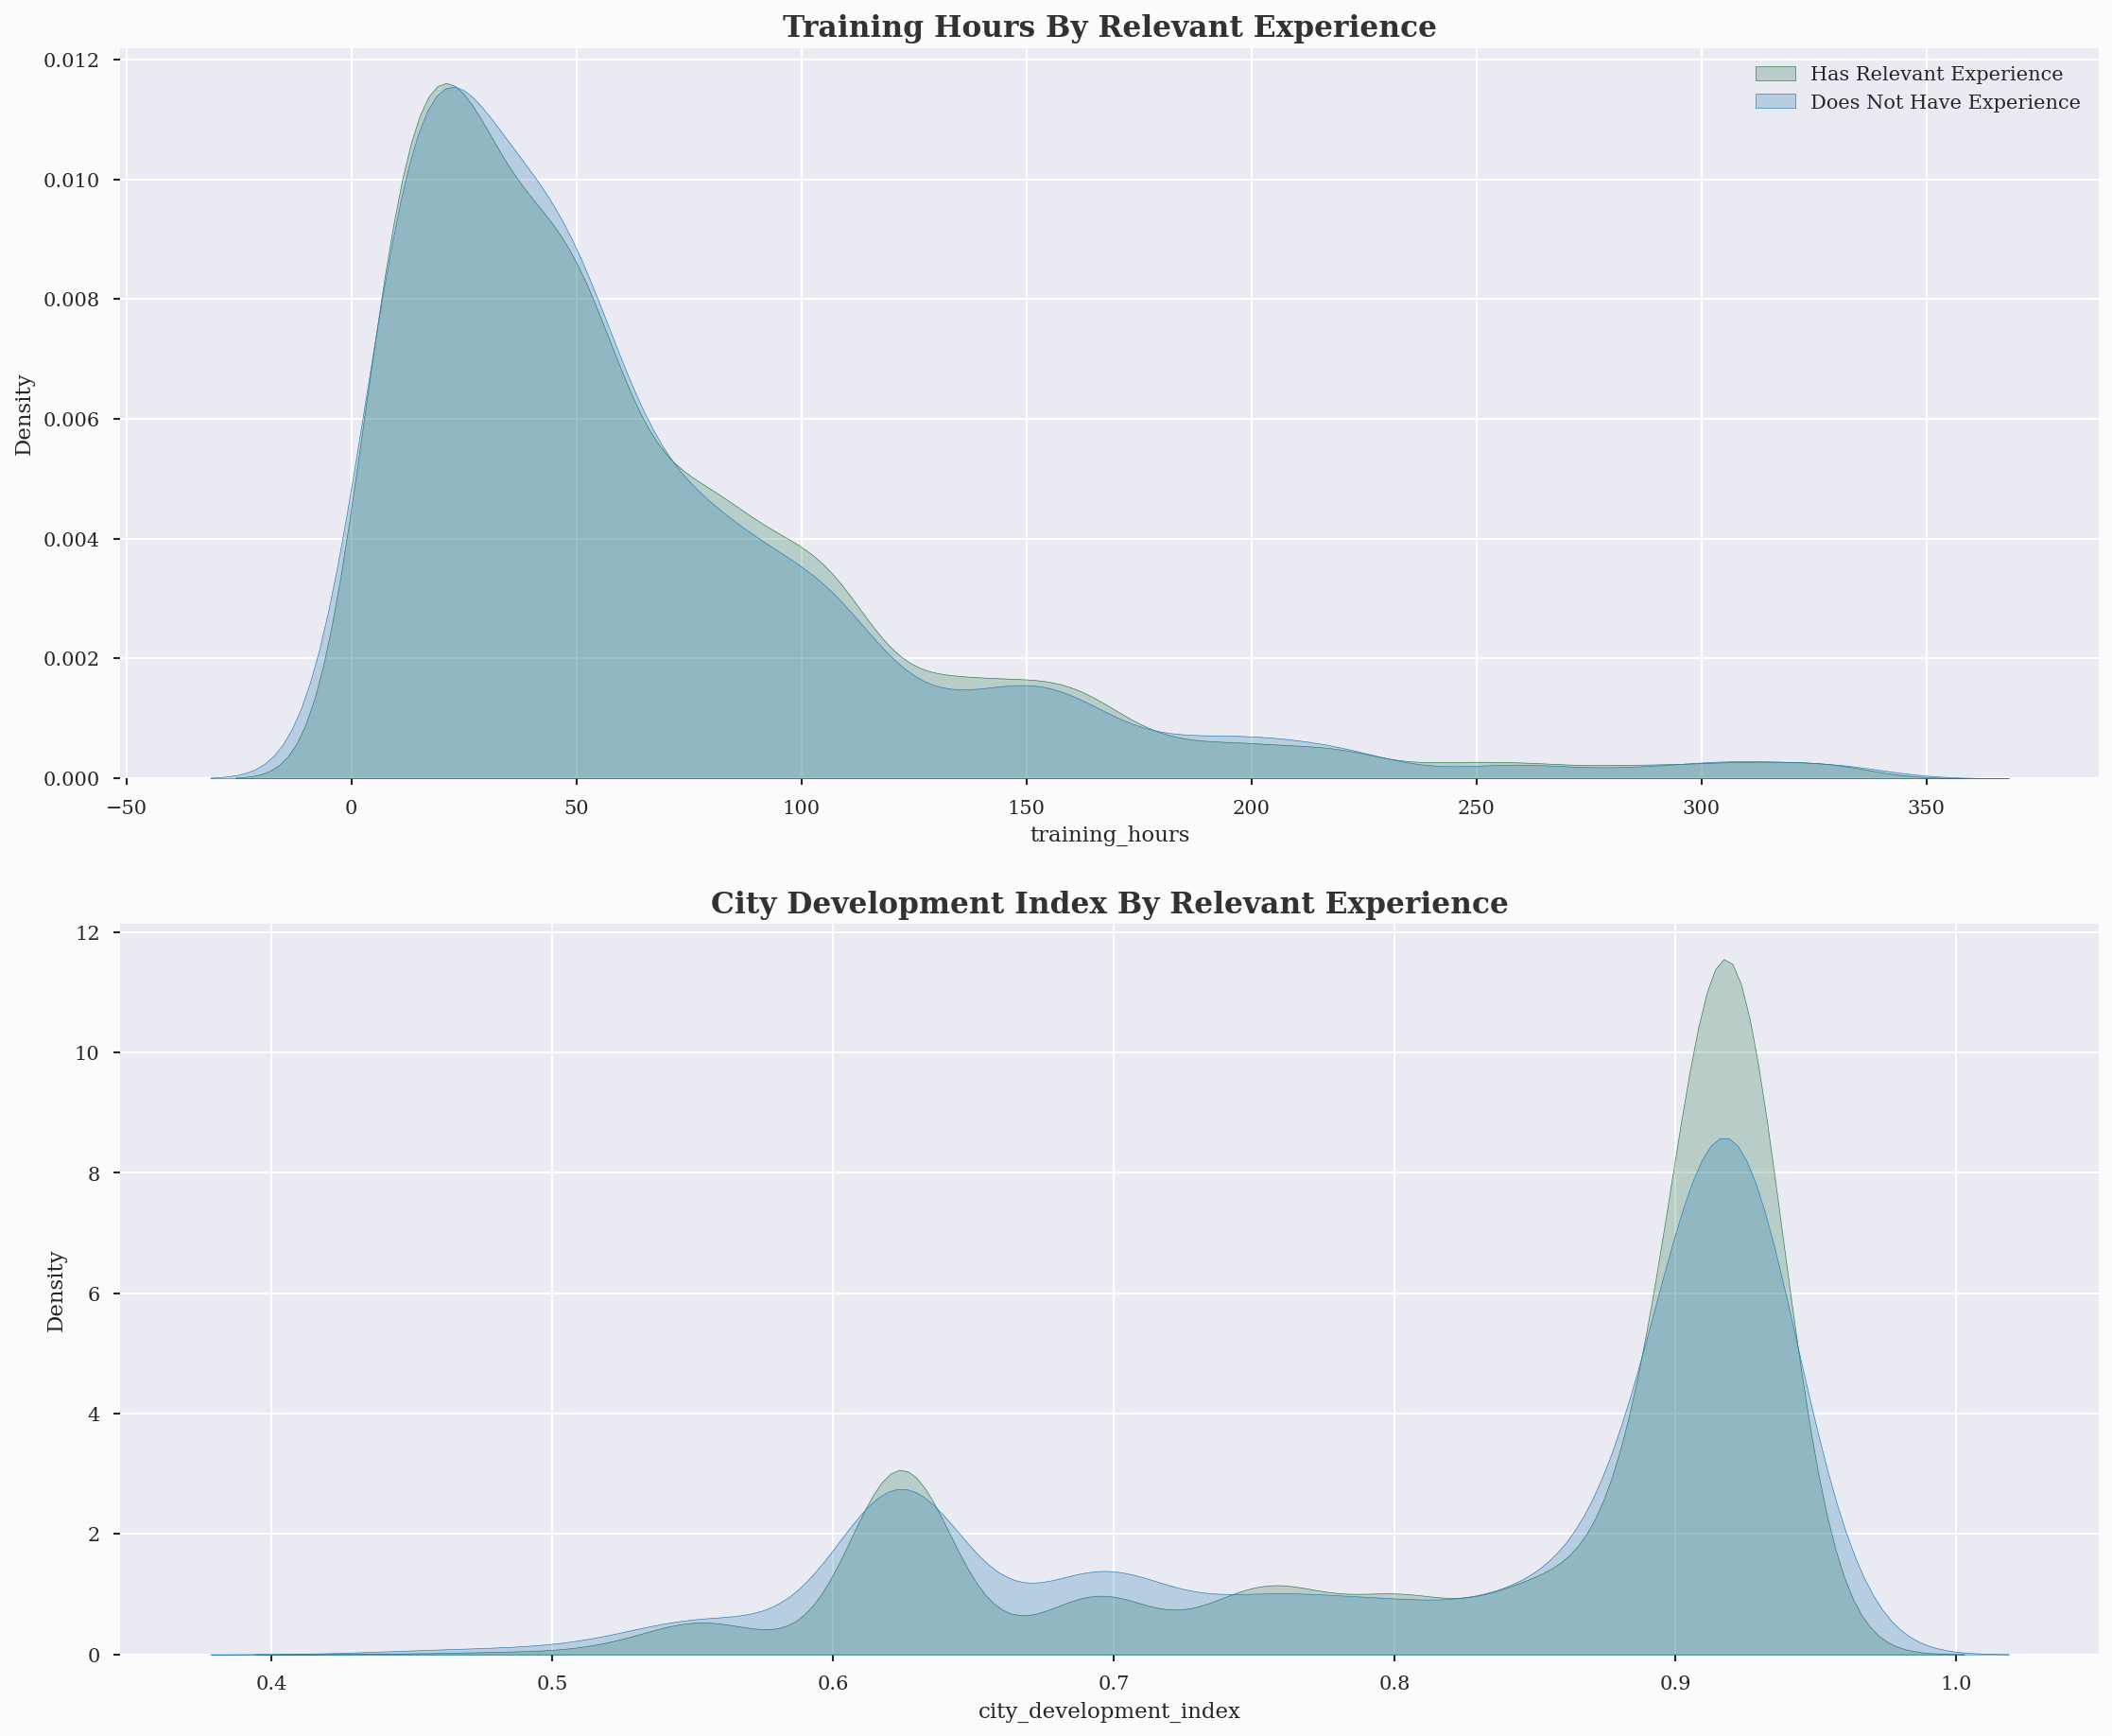

In [14]:
## Visualize distribution of numeric columns
columns = ['city_development_index', 'training_hours']

experienced = aug_train[aug_train.relevent_experience=='Has relevent experience']
inexperienced = aug_train[aug_train.relevent_experience=='No relevent experience']

color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours By Relevant Experience', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(experienced["training_hours"], color="#247747", shade=True, ax = ax0, zorder = 3, label='Has Relevant Experience')
sns.kdeplot(inexperienced["training_hours"], shade=True, ax = ax0, zorder = 3, label='Does Not Have Experience')
ax0.legend()

ax1.set_title('City Development Index By Relevant Experience', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(experienced["city_development_index"], color="#247747", shade=True, ax = ax1, zorder = 3)
sns.kdeplot(inexperienced["city_development_index"], shade=True, ax = ax1, zorder = 3)

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


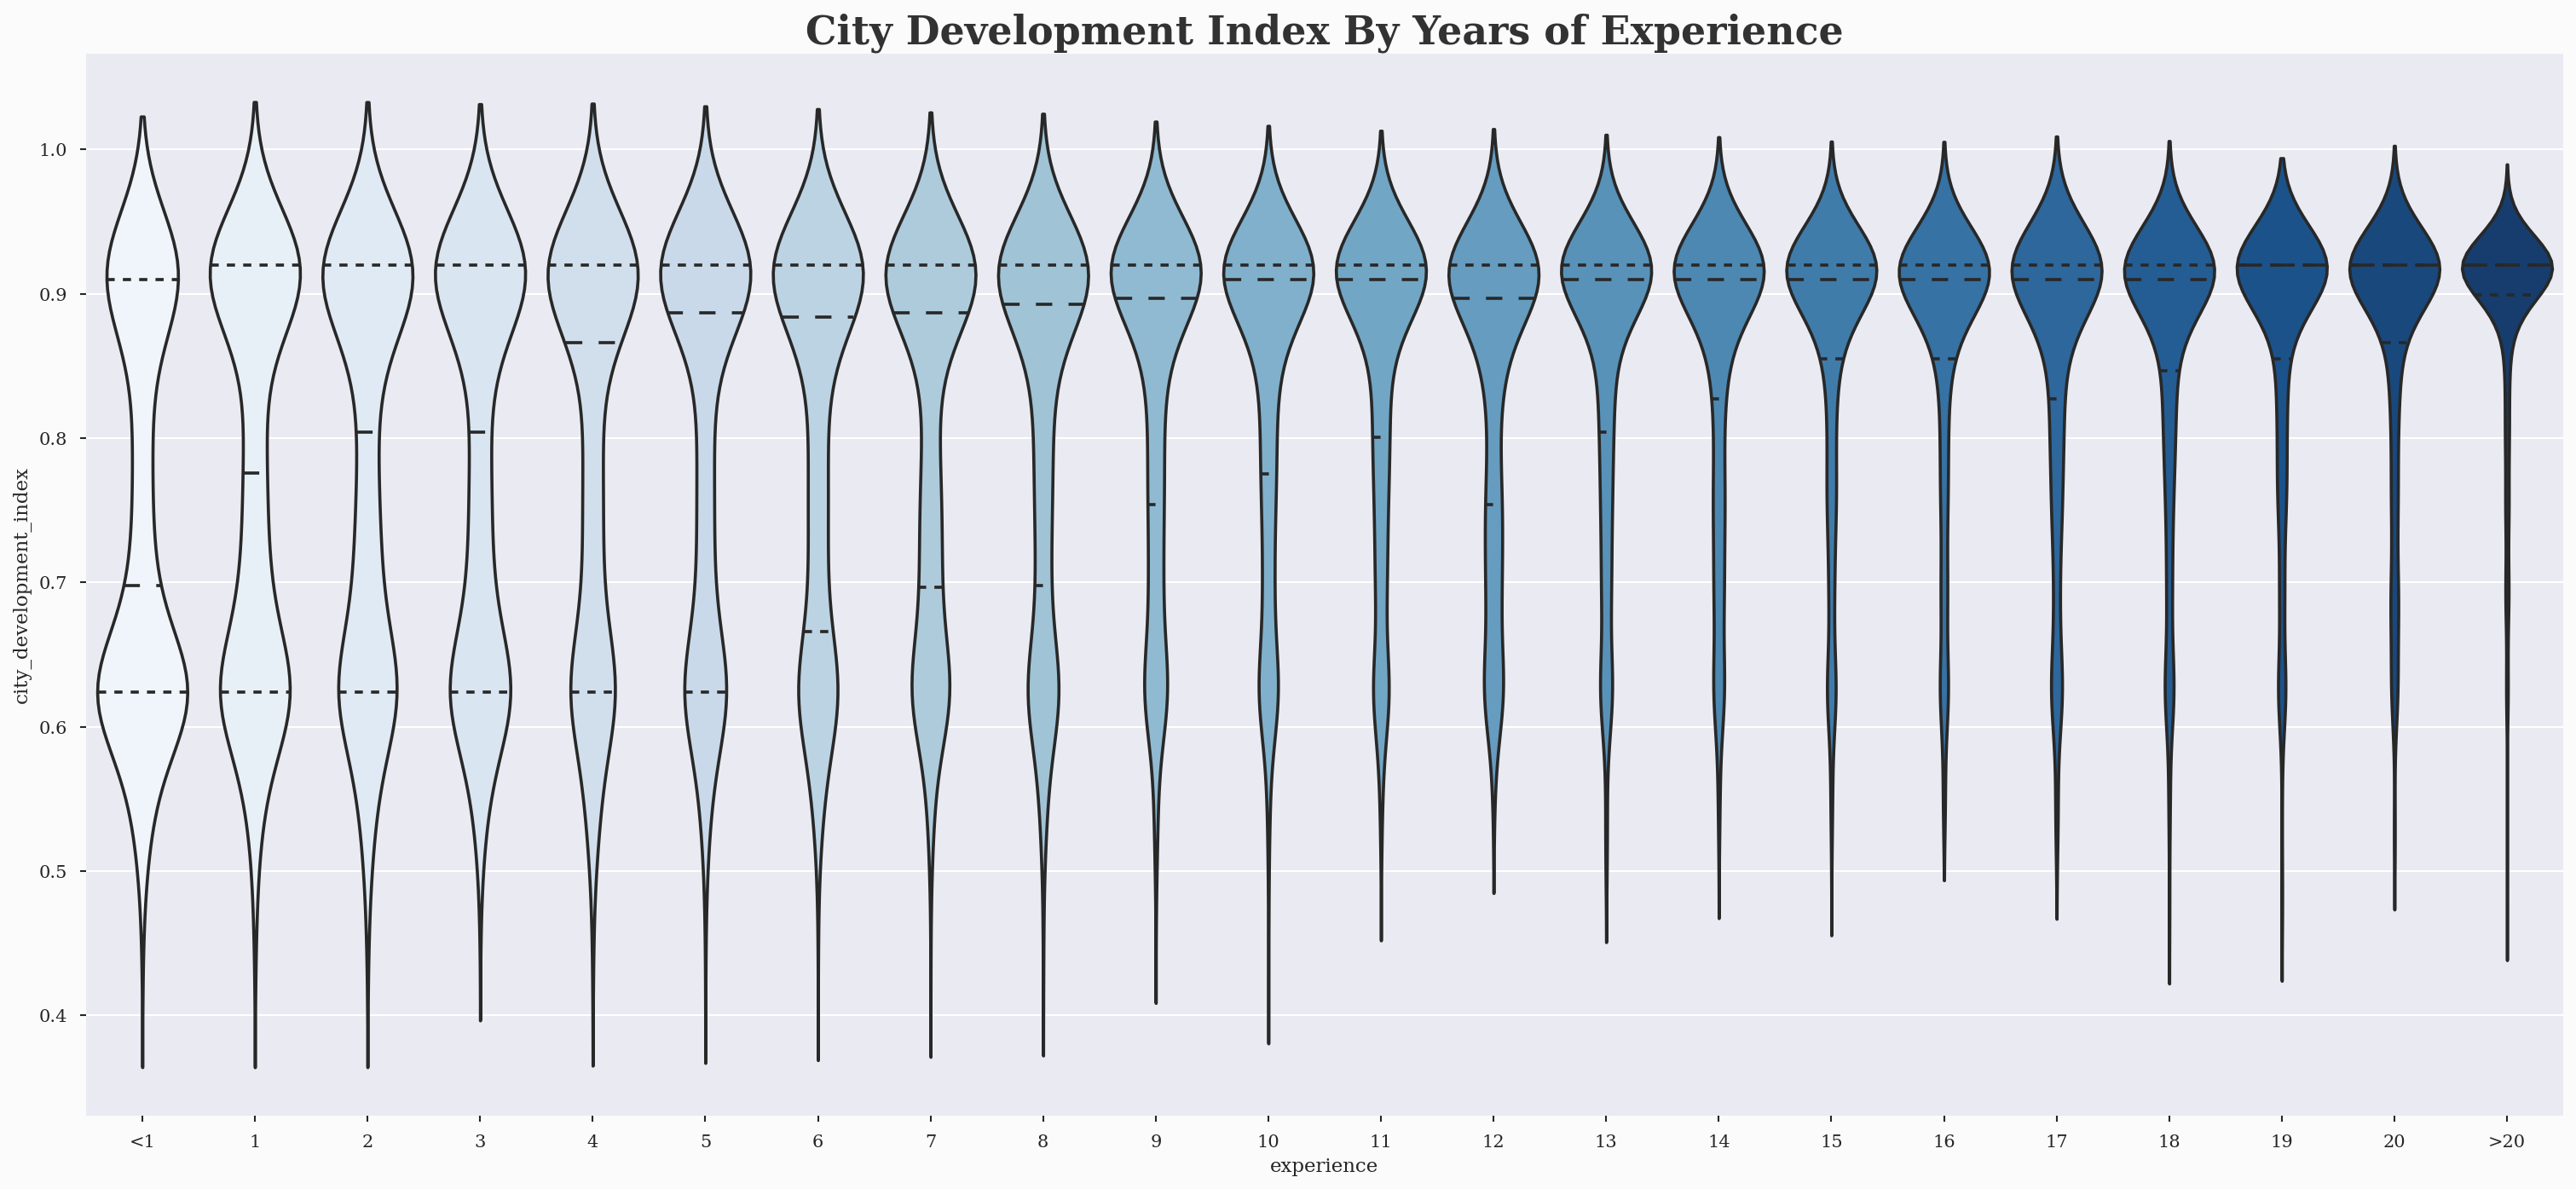

In [15]:
color_palette=["gray","#0e4f66"]
sequential_colors = sns.color_palette("Blues", len(exp_yrs_order[1:]))
fig = plt.figure(figsize=(25,11), dpi=150)
fig.patch.set_facecolor(background_color)
plt.title('City Development Index By Years of Experience', fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
sns.violinplot('experience', 'city_development_index', order = exp_yrs_order[1:] ,hue = 'experience', data = aug_train, 
               dodge = False, 
               palette = dict(zip(exp_yrs_order[1:],sequential_colors)),
               inner="quartile",
               bw=.3,
               legend = False)
plt.legend([],[], frameon=False)

/Users/clairest-donat/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


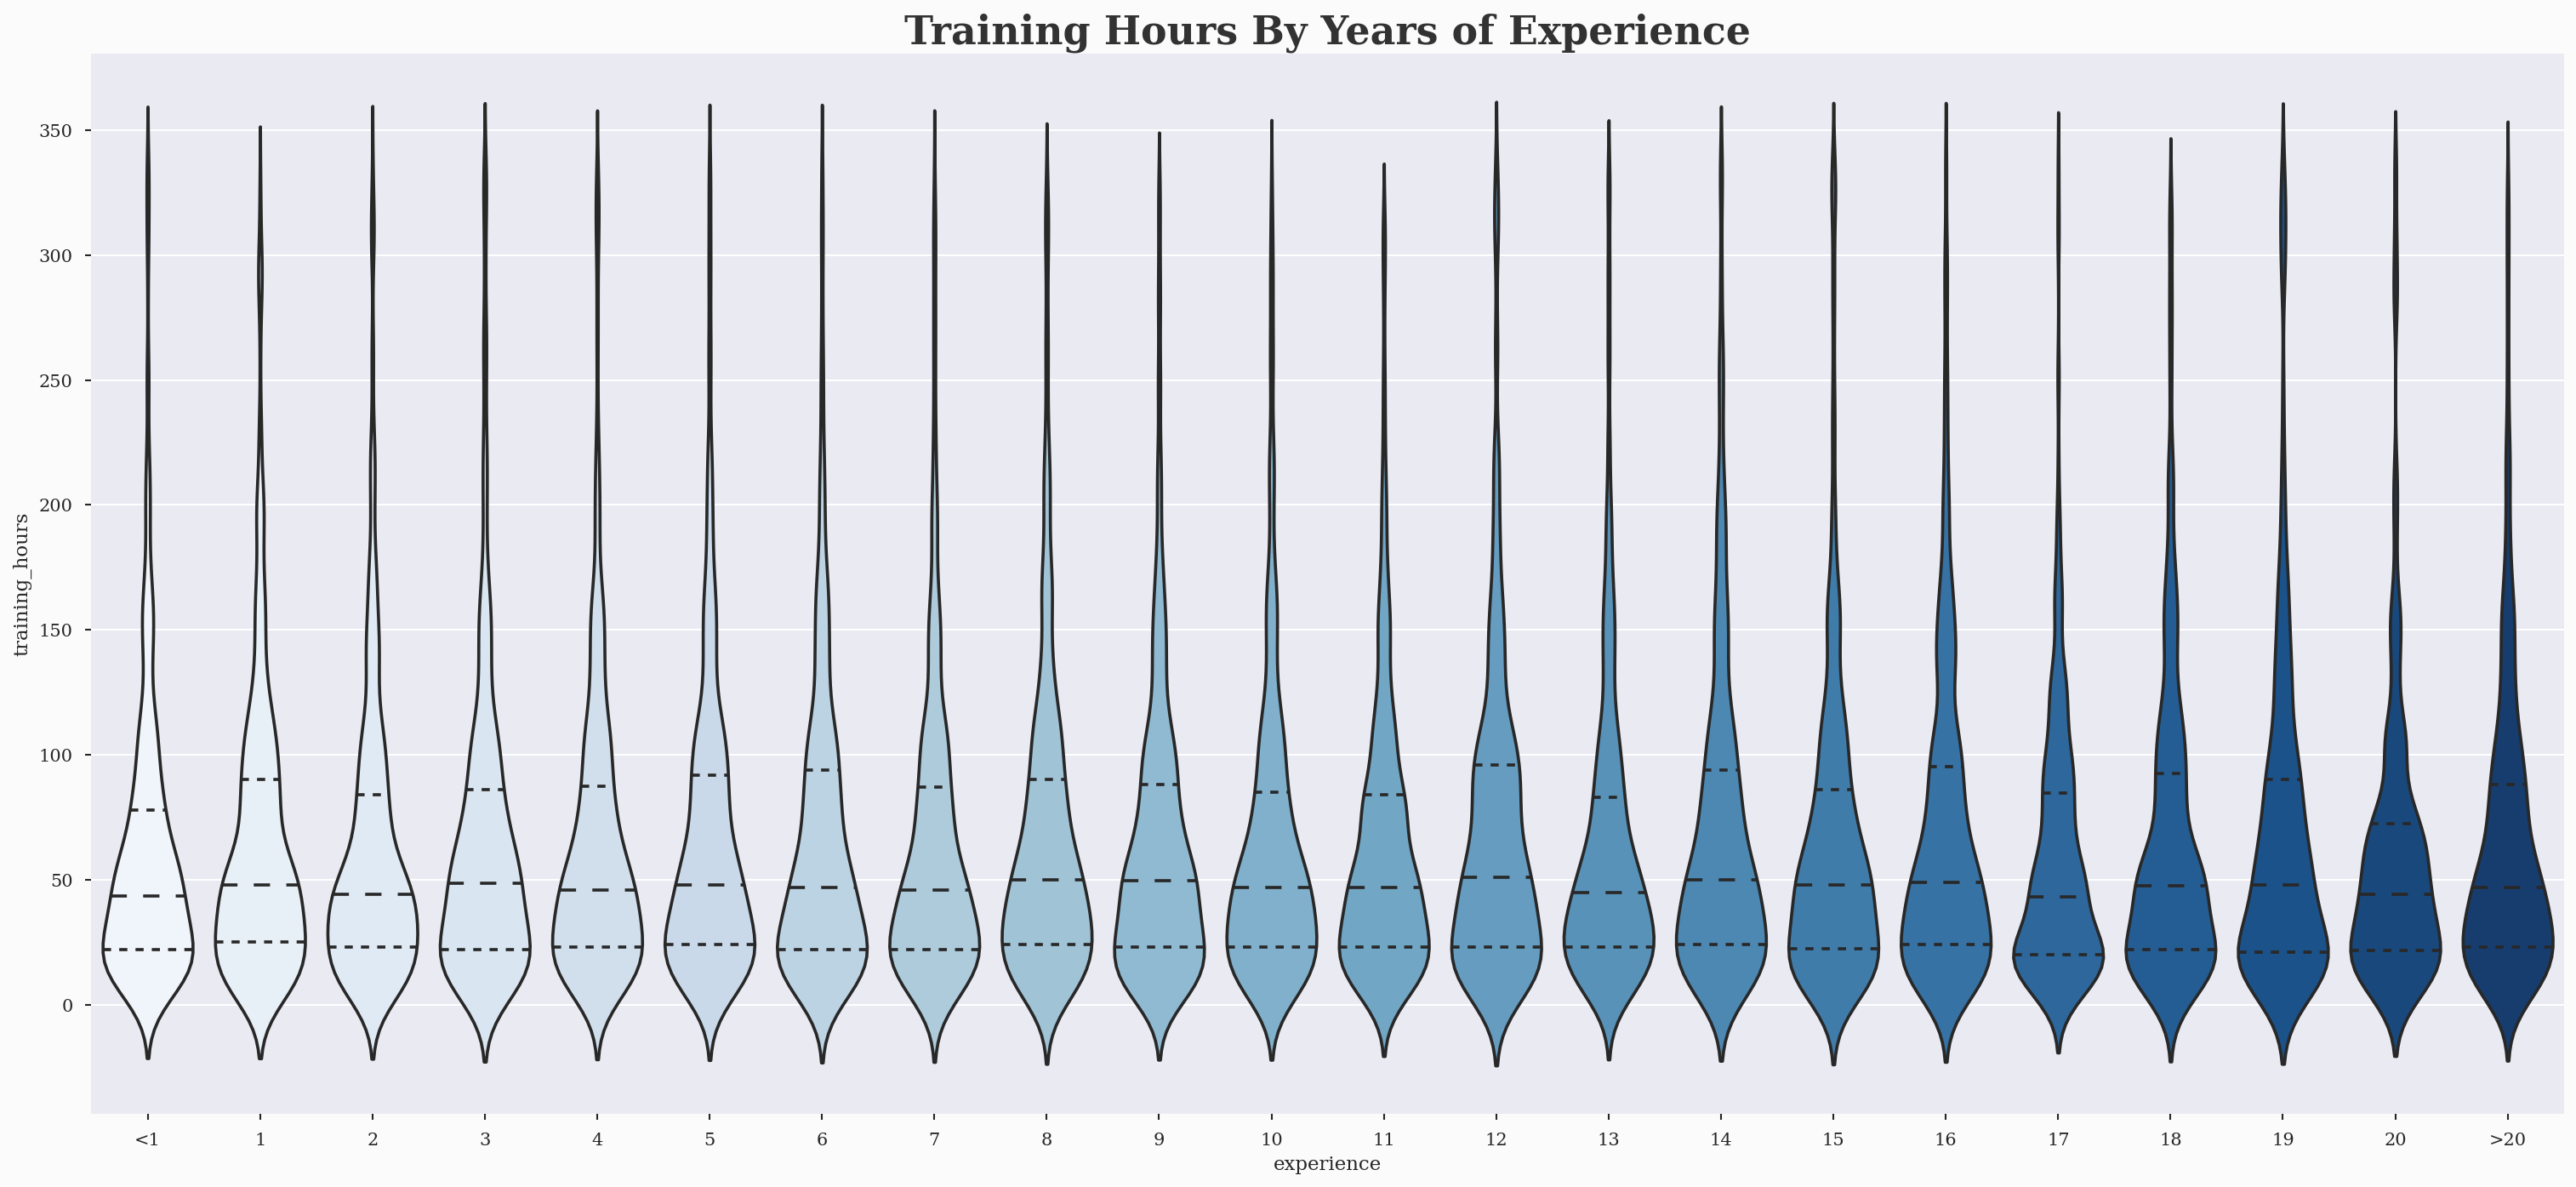

In [16]:
color_palette=["gray","#0e4f66"]
sequential_colors = sns.color_palette("Blues", len(exp_yrs_order[1:]))
fig = plt.figure(figsize=(25,11), dpi=150)
fig.patch.set_facecolor(background_color)
plt.title('Training Hours By Years of Experience', fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
sns.violinplot('experience', 'training_hours', order = exp_yrs_order[1:] ,hue = 'experience', data = aug_train, 
               dodge = False, 
               palette = dict(zip(exp_yrs_order[1:],sequential_colors)),
               inner="quartile",
               bw=.2,
               legend = False)
plt.legend([],[], frameon=False)

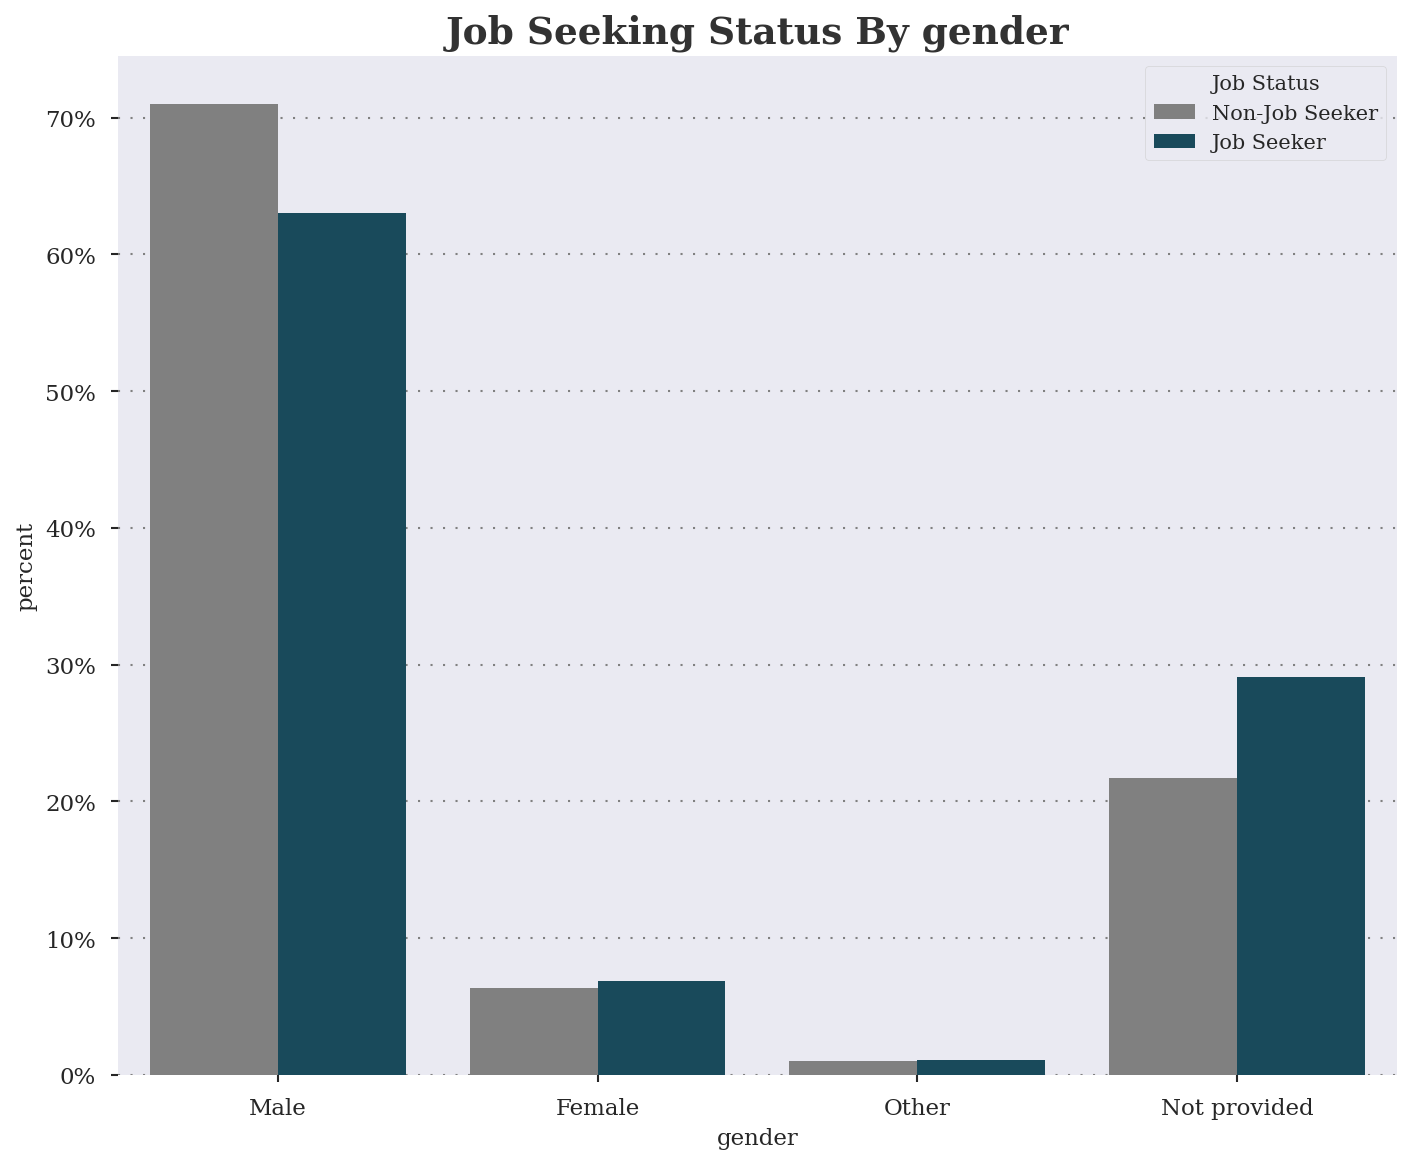

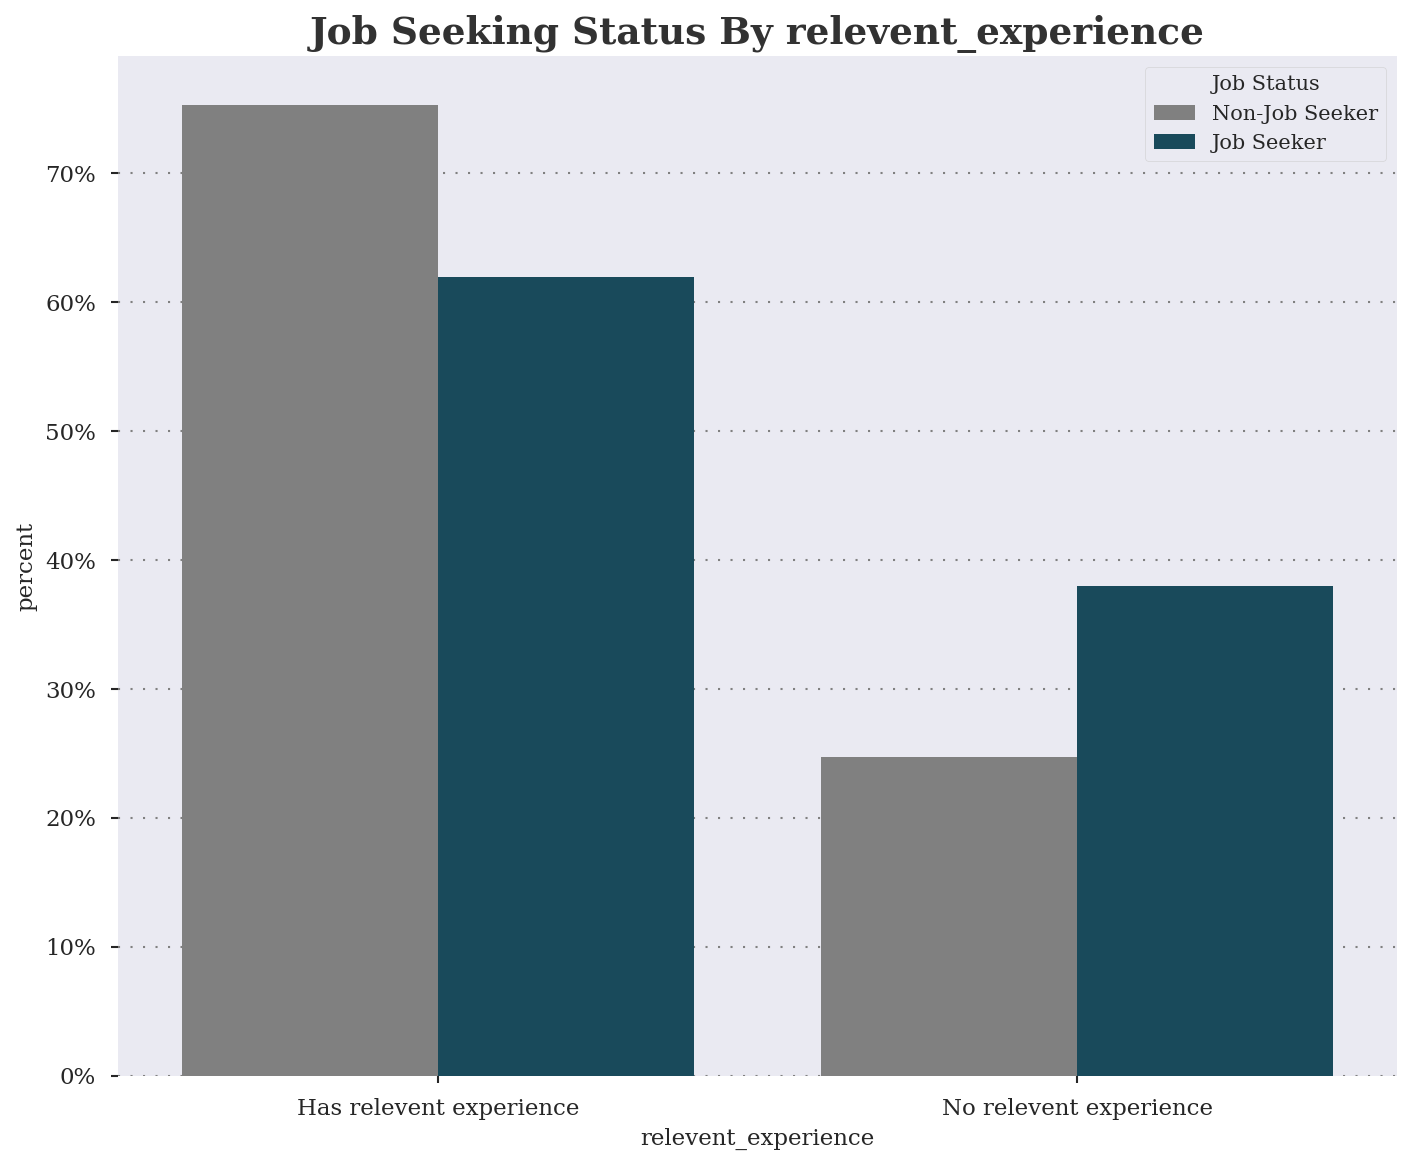

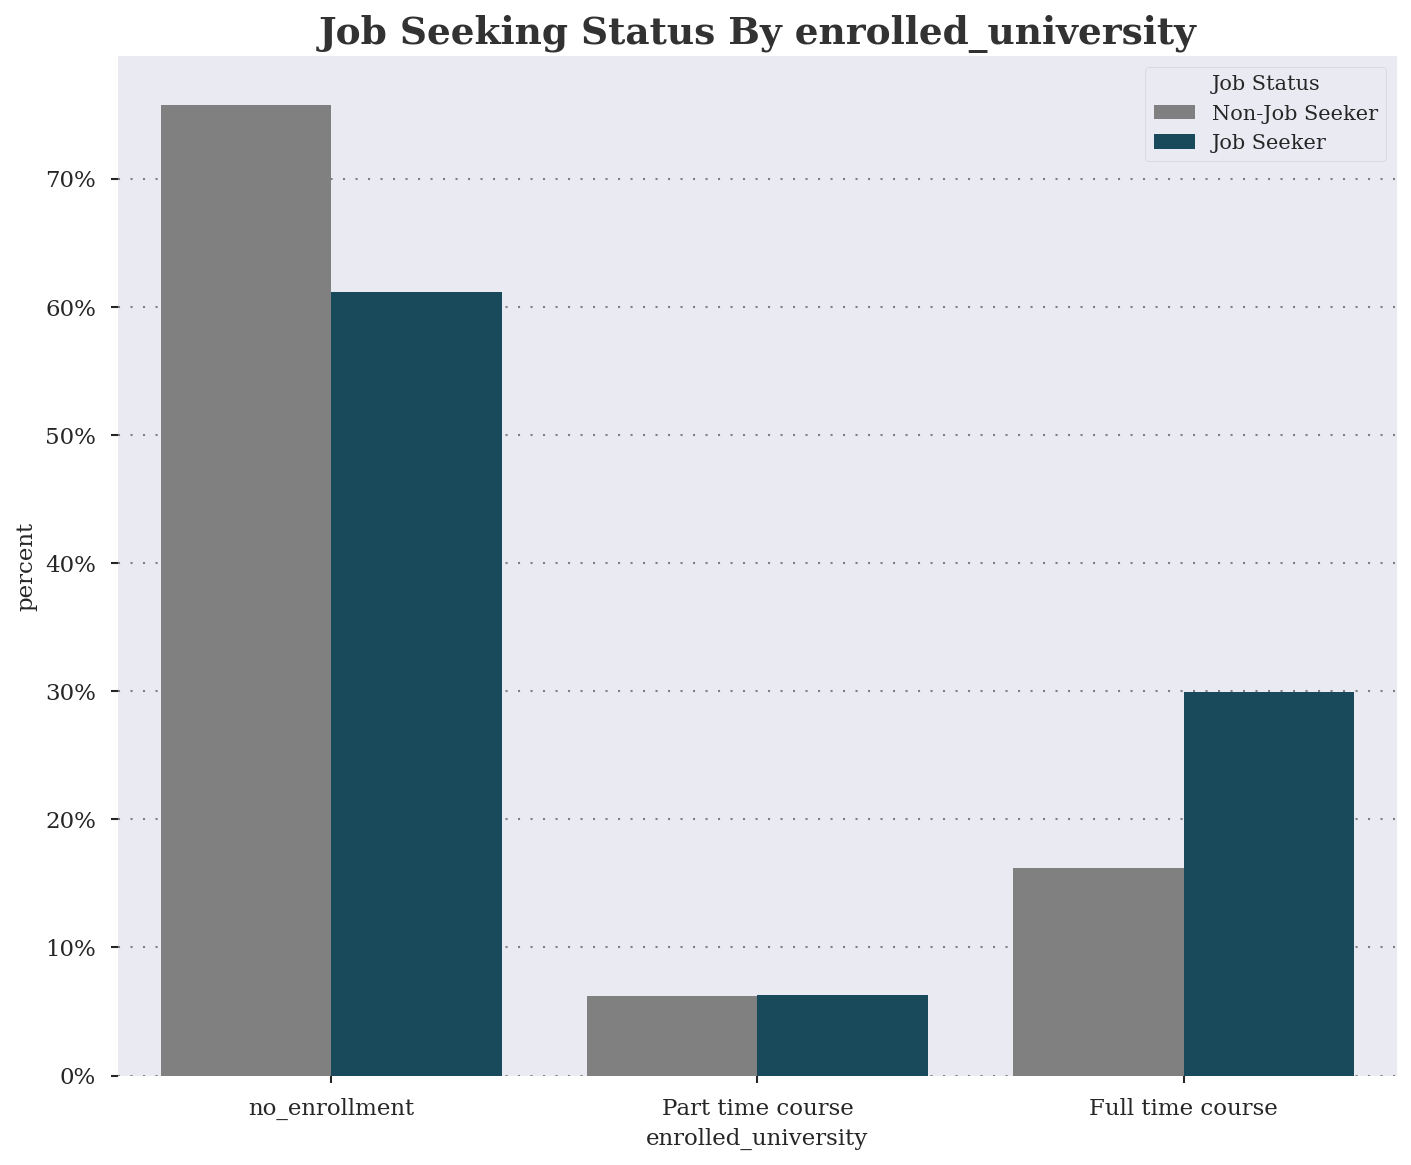

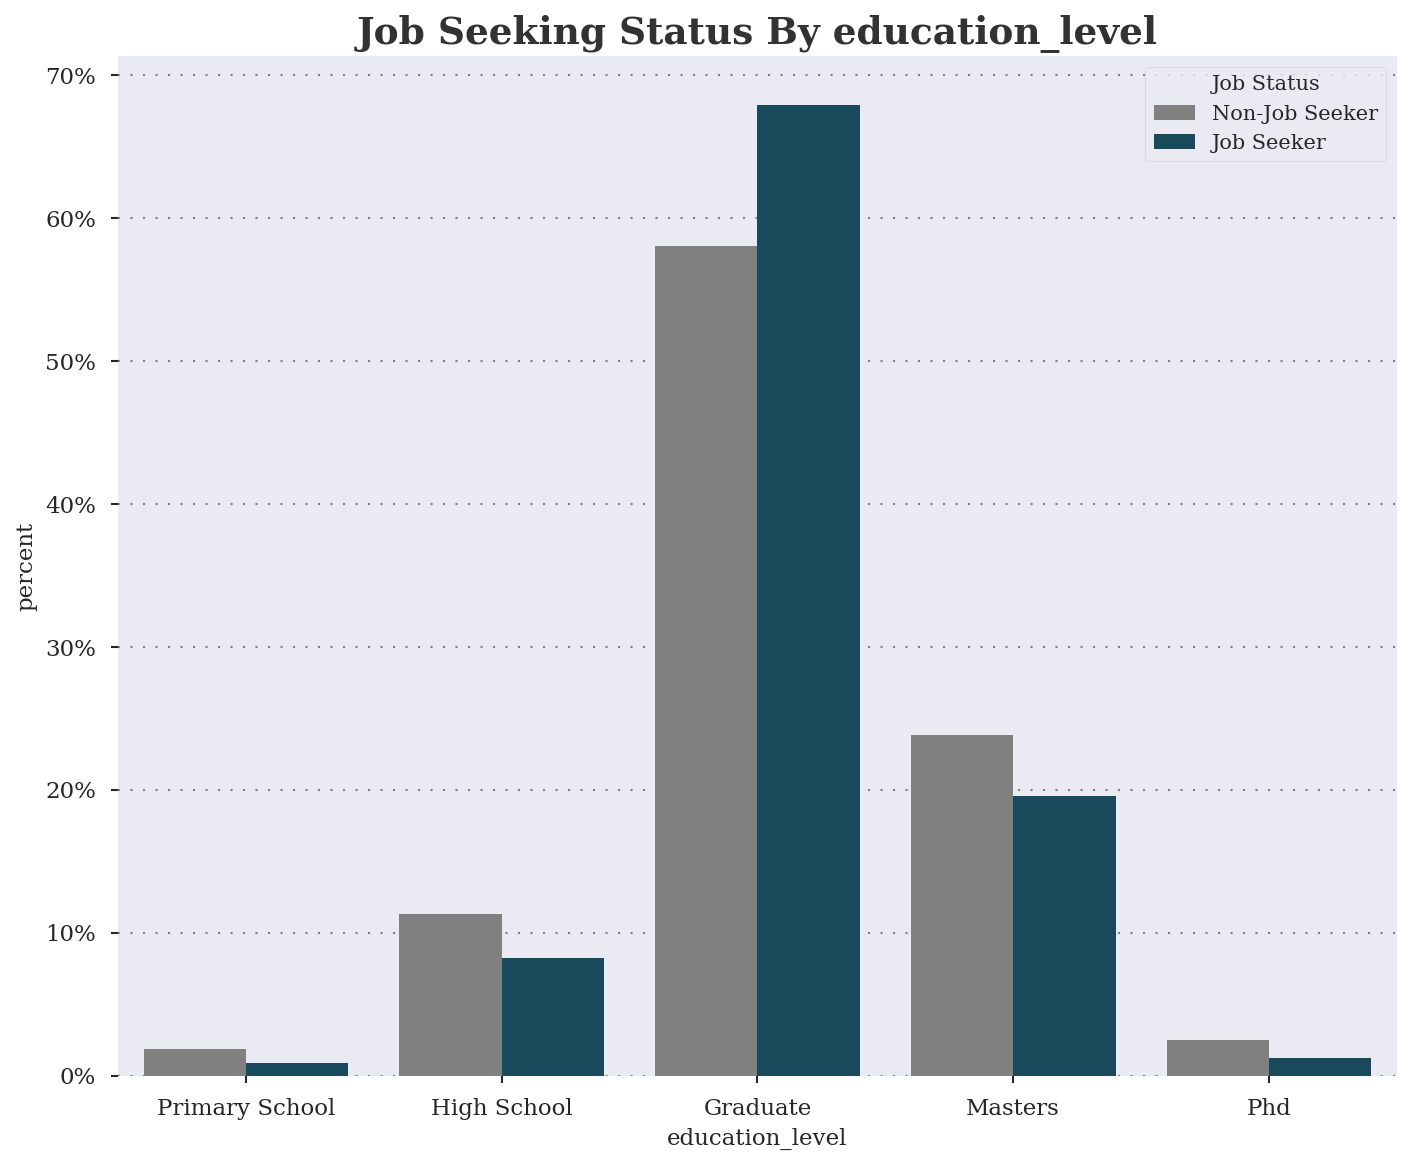

In [17]:
import warnings
warnings.filterwarnings('ignore')

## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()[:-1]

for col, col_order in zip(low_cardinality_categorical_cols, order_lists):
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    x,y = col, 'target'

    graph = aug_train.groupby(y)[x].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()
    graph[x] = graph[x].fillna('Not provided')
    graph.target = graph.target.map({'0.0':'Non-Job Seeker', '1.0':'Job Seeker'})    
    
    sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette=color_palette, order=col_order)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    plt.title(f"Job Seeking Status By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    h, l = ax.get_legend_handles_labels()
    ax.legend(title='Job Status', loc='upper right', frameon=True)
    plt.show()

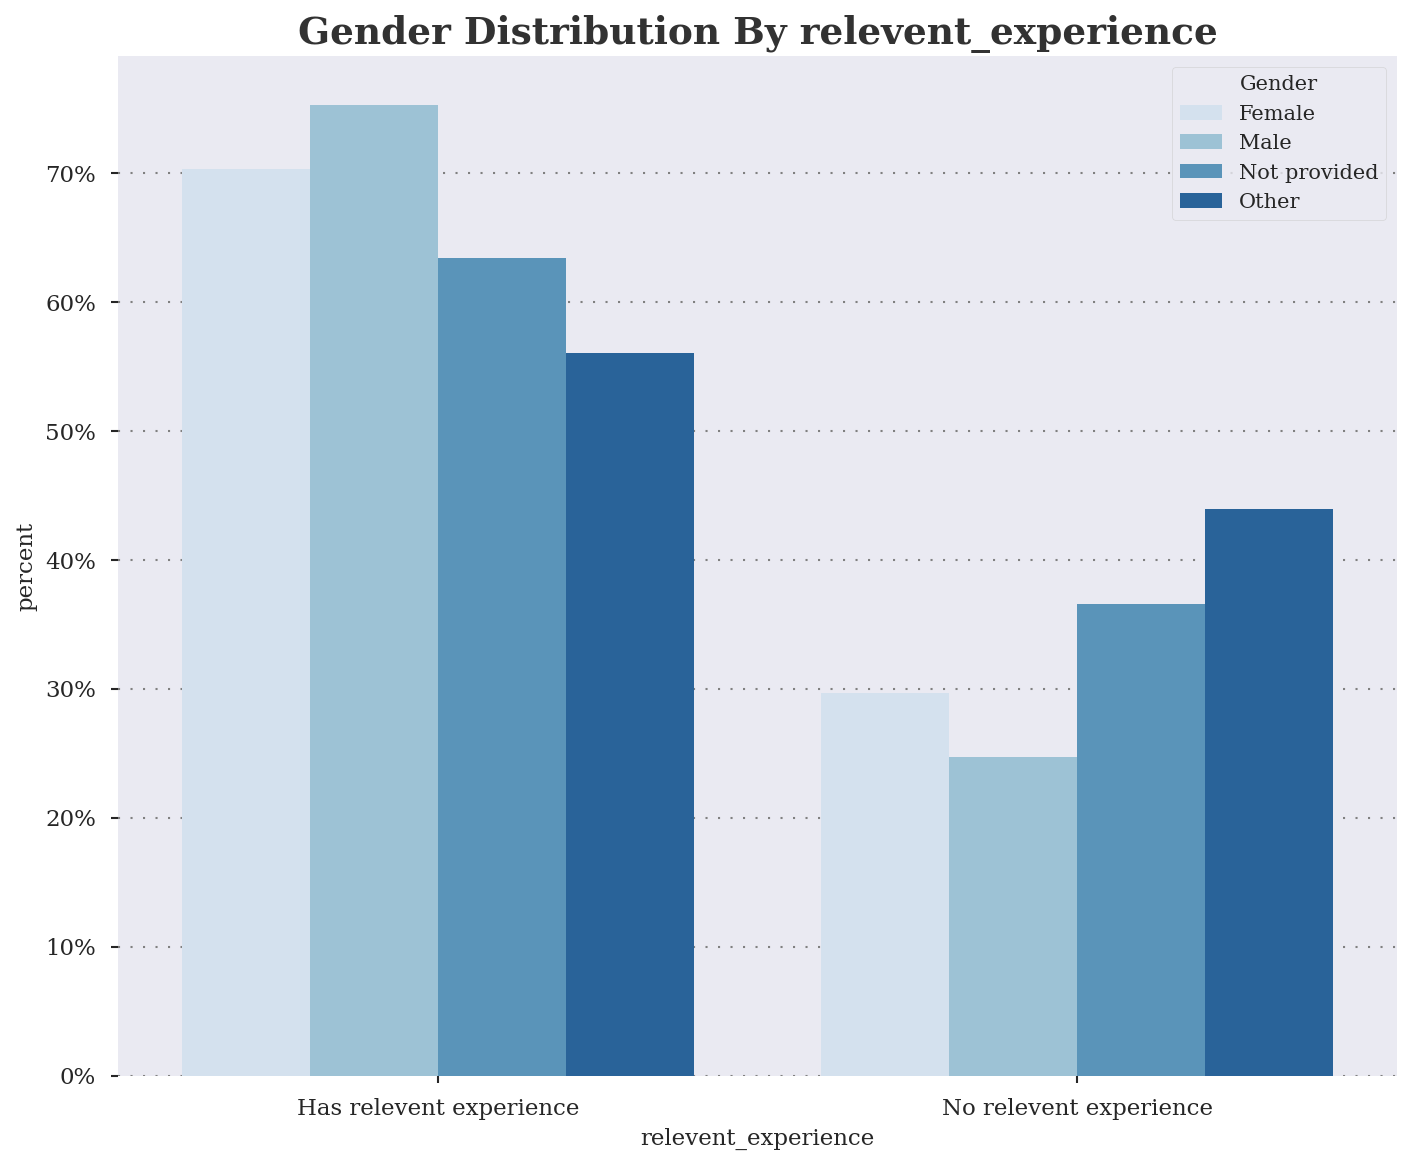

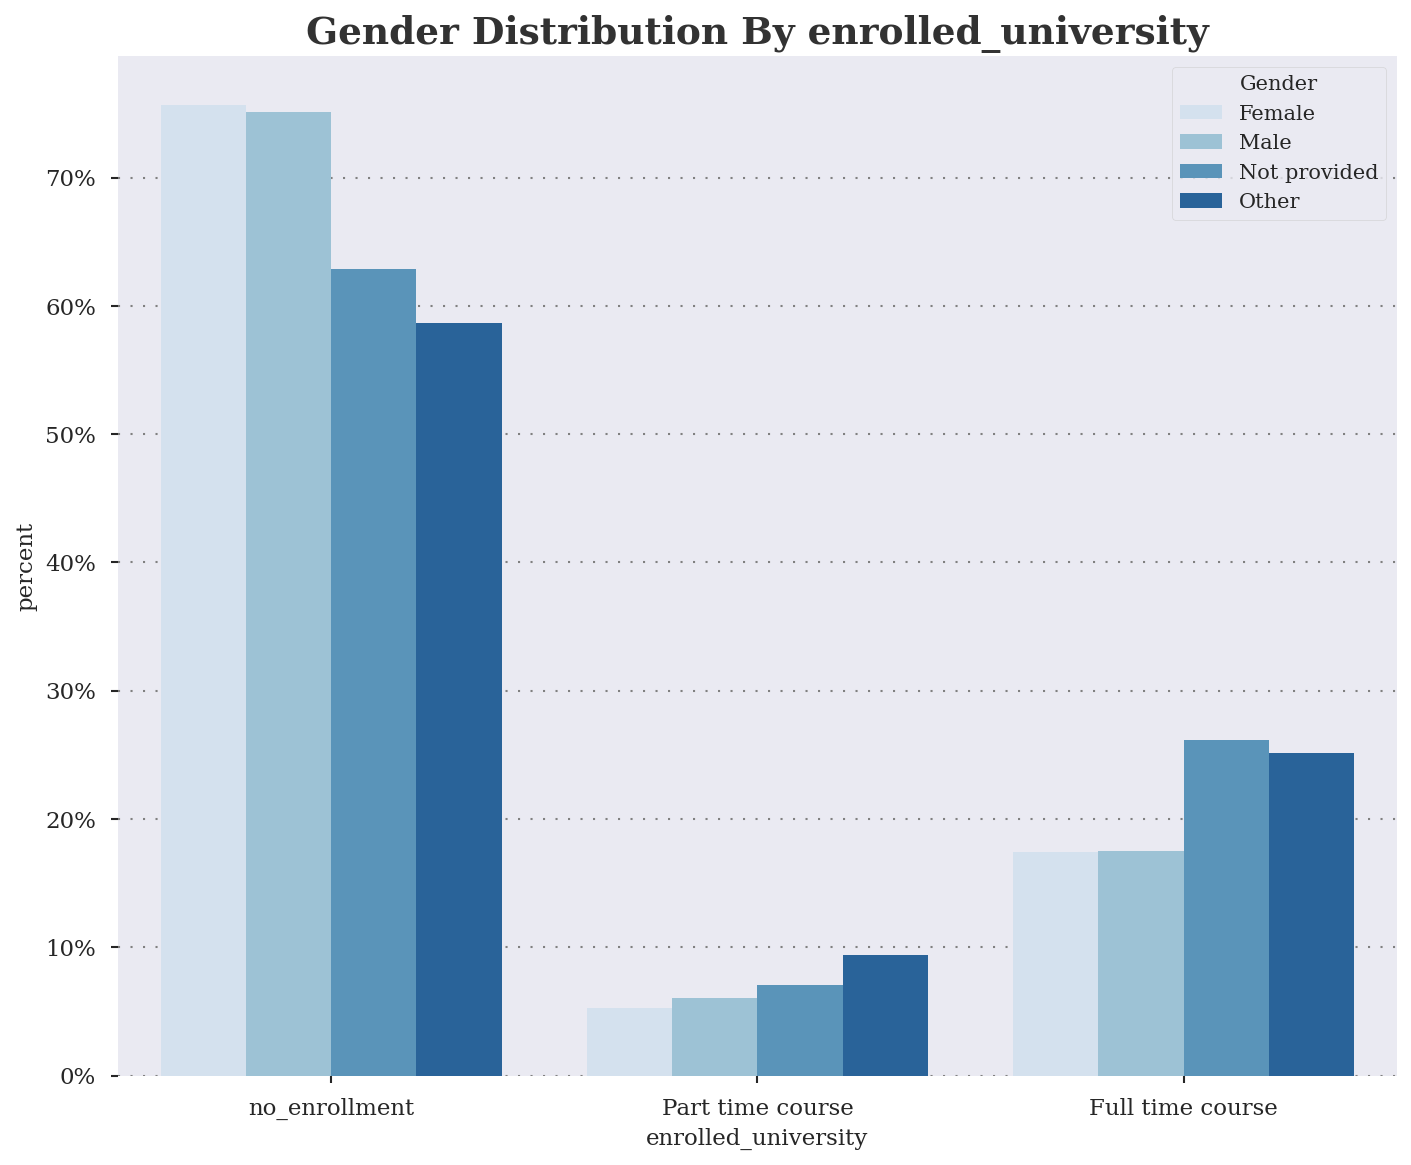

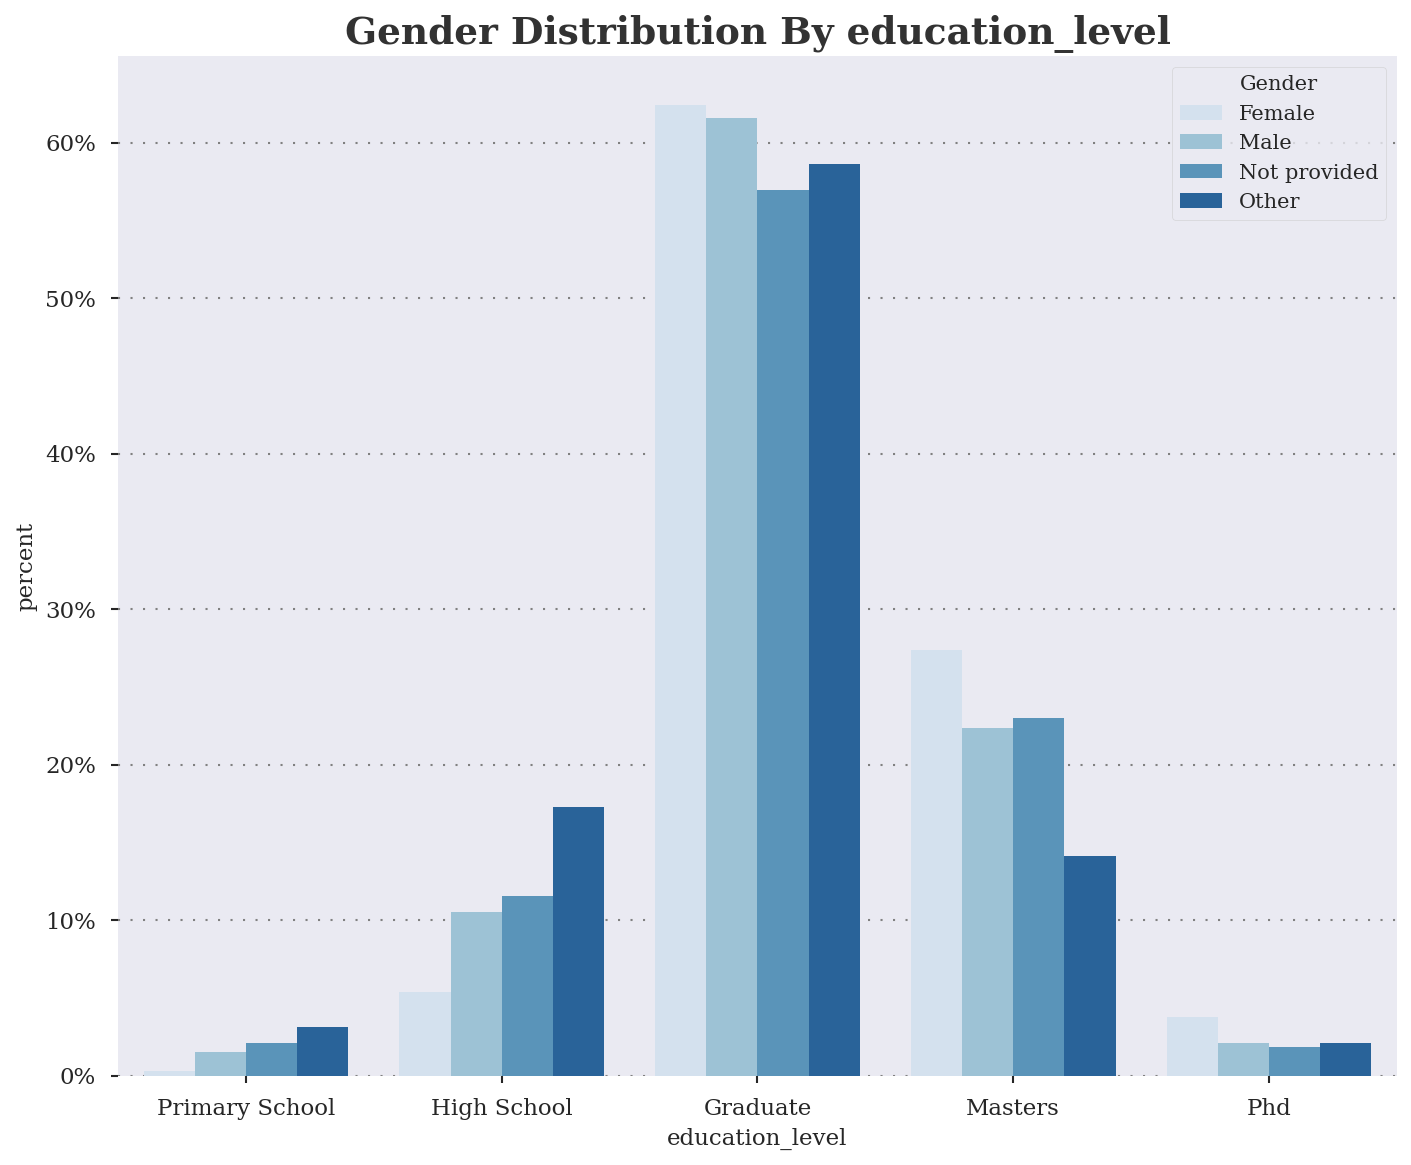

In [18]:
## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()[1:-1]
aug_train['gender'] = aug_train['gender'].fillna('Not provided')

for col, col_order in zip(low_cardinality_categorical_cols, order_lists[1:]):
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    x,y = col, 'gender'

    graph = aug_train.groupby(y)[x].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()
    graph[x] = graph[x].fillna('Not provided')    
    
    sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette='Blues', order=col_order)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    plt.title(f"Gender Distribution By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    h, l = ax.get_legend_handles_labels()
    ax.legend(title='Gender', loc='upper right', frameon=True)
    plt.show()

In [19]:
sns.barplot(data=graph, x='education_level', y='percent', hue='relevent_experience', ax=ax, palette='Blues', order=col_order)
#graph

ValueError: Could not interpret input 'relevent_experience'

In [ ]:
## Capture categorial features with low cardinality
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()
low_cardinality_categorical_cols.remove('relevent_experience')
order_lists.remove(relevant_experience_order)

In [ ]:
for col, col_order in zip(low_cardinality_categorical_cols, order_lists[1:]):
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    x,y = col, 'relevent_experience'

    graph = aug_train.groupby(y)[x].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()
    graph[x] = graph[x].fillna('Not provided')    
    
    display(graph)
    
    sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette='Blues', order=col_order)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    plt.title(f"Experience Distribution By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    h, l = ax.get_legend_handles_labels()
    ax.legend(title='Experience', loc='upper right', frameon=True)
    plt.show()

In [ ]:
background_color = "#fbfbfb"

fig, ax = plt.subplots(figsize=(11,9), dpi=150)

x,y = 'gender', 'relevent_experience'

graph = aug_train.groupby(y)[x].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()
graph[x] = graph[x].fillna('Not provided')    

display(graph)

sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette='Blues', order=col_order)

ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.title(f"Experience Distribution By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
#h, l = ax.get_legend_handles_labels()
ax.legend(title='Experience', loc='upper right', frameon=True)
plt.show()

In [ ]:
    
sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette=color_palette)

 
pd.DataFrame(aug_train.isnull().mean()).rename('percentage')

In [ ]:
# Cycle through all categorical variables with low cardinality
cat_columns = aug_train.select_dtypes(include=['object']).columns.tolist()
high_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()>5].tolist()

high_cardinality_categorical_cols = list(set(cat_columns) & set(high_cardinality_categorical_cols))
high_cardinality_categorical_cols.remove('city')

for col in high_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)
    x,y = col, 'target'

    graph = aug_train.groupby('target')['company_size'].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()


    graph[x] = graph[x].fillna('Not provided')
    graph.target = graph.target.map({0:'Non-Job Seeker', 1:'Job Seeker'})    

In [ ]:
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()[:-1]

for col in low_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    x,y = col, 'target'

    graph = aug_train.groupby(y)[x].value_counts(normalize=True, dropna = False).mul(100).rename('percent').reset_index()
    graph[x] = graph[x].fillna('Not provided')
    graph.target = graph.target.map({0:'Non-Job Seeker', 1:'Job Seeker'})    
    
    sns.barplot(data=graph, x=x, y='percent', hue=y, ax=ax, palette=color_palette)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    plt.title(f"Job Seeking Status By {col}", fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    h, l = ax.get_legend_handles_labels()
    ax.legend(title='Job Status', loc='upper right', frameon=True)
    plt.show()

In [ ]:
for col in high_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.barh(graph.index, graph[col], zorder=3, color='#0e4f66')

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

In [ ]:
x,y = 'gender', 'target'

(aug_train
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title("Job Seeking Status by Gender")

In [ ]:
filled_train = aug_train.fillna('Missing')
filled_train.groupby('gender')[target].value_counts()